# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file
df2 = pd.read_parquet('D:\\Priya_Study\\UPGRAD_Masters_AIML\\AIML_Main_course\\05_ EDA on NYC Taxi Records\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload


In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('D:\\Priya_Study\\UPGRAD_Masters_AIML\\AIML_Main_course\\05_ EDA on NYC Taxi Records\\Datasets and Dictionary\\trip_records\\')

# Create a list of all the twelve files to read
file_list = os.listdir()
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        print("PROCESSING FILE: ",file_path)
        trips = pd.read_parquet(file_path)
        trips['PUdate'] = pd.to_datetime(trips['tpep_pickup_datetime'].dt.date,yearfirst=True)
        trips['PUhour'] = trips['tpep_pickup_datetime'].dt.hour
        trips['PUyear'] = trips['tpep_pickup_datetime'].dt.year
        trips['PUmonth'] = trips['tpep_pickup_datetime'].dt.month
        trips['PUmday'] = trips['tpep_pickup_datetime'].dt.day
        trips['PUyear'].unique()
        # This 2023 year data still has some records from other years , As we are interested only in 2023 year data, remove any records with Year !=2023
        trips= trips[trips['PUyear']==2023]
        mlist=sorted(trips['PUmonth'].unique())
        dlist=sorted(trips['PUmday'].unique())
        hlist=sorted(trips['PUhour'].unique())

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

     
        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date


        for mnth in mlist:
            for day in dlist:
                for hr in hlist:
                    #print( mnth,day,hr)
                    hour_data=trips[(trips['PUmonth']==mnth) & (trips['PUmday']==day) & (trips['PUhour']==hr)]
                    
                # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample]) 
        # Concatenate the sampled data of all the dates to a single dataframe
        df =   pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records\Datasets and Dictionary\trip_records\2023-1.parquet
PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records\Datasets and Dictionary\trip_records\2023-10.parquet
PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records\Datasets and Dictionary\trip_records\2023-11.parquet
PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records\Datasets and Dictionary\trip_records\2023-12.parquet
PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records\Datasets and Dictionary\trip_records\2023-2.parquet
PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records\Datasets and Dictionary\trip_records\2023-3.parquet
PROCESSING FILE:  D:\Priya_Study\UPGRAD_Masters_AIML\AIML_Main_course\05_ EDA on NYC Taxi Records

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [21]:
df.shape

(1896399, 25)

In [24]:
sampled_data.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2703421         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
2706224         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
2702893         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
2700485         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
2705104         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2703421           0.79         1.0                  N           231   
2706224           0.50         1.0                  N           158   
2702893           1.09         1.0                  N           161   
2700485          13.20         1.0                  N           164   
2705104           2.97         1.0                  N           231   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
2703421           231             1  ...           0.0                    1.0   
2706224            68             1  ...           0.0                    1.0   
2702893           162             1  ...           0.0                    1.0   
2700485            14             2  ...           0.0                    1.0   
2705104            68             1  ...           0.0                    1.0   

         total_amount  congestion_surcharge  Airport_fee     PUdate  PUhour  \
2703421         15.60                   2.5          0.0 2023-09-30      23   
2706224         12.95                   2.5          0.0 2023-09-30      23   
2702893         17.16                   2.5          0.0 2023-09-30      23   
2700485         59.80                   2.5          0.0 2023-09-30      23   
2705104         26.40                   2.5          0.0 2023-09-30      23   

         PUyear  PUmonth PUmday  
2703421    2023        9     30  
2706224    2023        9     30  
2702893    2023        9     30  
2700485    2023        9     30  
2705104    2023        9     30  

[5 rows x 24 columns]

In [28]:
#Store the df in csv/parquet
df.to_parquet('D:\\Priya_Study\\UPGRAD_Masters_AIML\\AIML_Main_course\\05_ EDA on NYC Taxi Records\\sampled_data_2023_v1.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [20]:
#clean any unwanted dataframe from above code to free up memory
del [[df2]]

In [22]:
# Load the new data file

df = pd.read_parquet('D:\\Priya_Study\\UPGRAD_Masters_AIML\\AIML_Main_course\\05_ EDA on NYC Taxi Records\\sampled_data_2023_v1.parquet')
df.PUmonth.unique() # To confirm the sample has all months data of the year 2023

array([ 1,  9, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8])

In [24]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
428               256             2  ...                    1.0         41.15   
1113              237             1  ...                    1.0         15.48   
819               141             2  ...                    1.0         16.40   
3192              142             2  ...                    1.0         11.50   
2995263           107             0  ...                    1.0         35.57   

         congestion_surcharge  airport_fee     PUdate  PUhour  PUyear  \
428                       0.0         1.25 2023-01-01       0    2023   
1113                      2.5         0.00 2023-01-01       0    2023   
819                       2.5         0.00 2023-01-01       0    2023   
3192                      2.5         0.00 2023-01-01       0    2023   
2995263                   NaN          NaN 2023-01-01       0    2023   

         PUmonth  PUmday Airport_fee  
428            1       1         NaN  
1113           1       1         NaN  
819            1       1         NaN  
3192           1       1         NaN  
2995263        1       1         NaN  

[5 rows x 25 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896399 entries, 428 to 2705104
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

In [28]:
df.duplicated().sum()

0

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [31]:
# Fix the index and drop any columns that are not needed

df.reset_index(inplace=True,drop=True)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  improvement_surcharge  total_amount  \
0             2  ...                    1.0         41.15   
1             1  ...                    1.0         15.48   
2             2  ...                    1.0         16.40   
3             2  ...                    1.0         11.50   
4             0  ...                    1.0         35.57   

   congestion_surcharge  airport_fee     PUdate  PUhour  PUyear  PUmonth  \
0                   0.0         1.25 2023-01-01       0    2023        1   
1                   2.5         0.00 2023-01-01       0    2023        1   
2                   2.5         0.00 2023-01-01       0    2023        1   
3                   2.5         0.00 2023-01-01       0    2023        1   
4                   NaN          NaN 2023-01-01       0    2023        1   

   PUmday Airport_fee  
0       1         NaN  
1       1         NaN  
2       1         NaN  
3       1         NaN  
4       1         NaN  

[5 rows x 25 columns]

In [32]:
df.columns
df=df.drop(columns=['store_and_fwd_flag'])
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [34]:
# Combine the two airport fee columns
df['airport_fee'].isnull().sum()
#df.head()


1747917

In [37]:
df['airport_fee']=df['airport_fee'].combine_first(df['Airport_fee'])


In [41]:
df['airport_fee'].isnull().sum()

64874

In [43]:

df=df.drop(columns=['Airport_fee'])
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1896394         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896395         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896396         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896397         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896398         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1896394           0.79         1.0           231           231             1   
1896395           0.50         1.0           158            68             1   
1896396           1.09         1.0           161           162             1   
1896397          13.20         1.0           164            14             2   
1896398           2.97         1.0           231            68             1   

         fare_amount  ...  tolls_amount  improvement_surcharge  total_amount  \
1896394          8.6  ...           0.0                    1.0         15.60   
1896395          5.8  ...           0.0                    1.0         12.95   
1896396          9.3  ...           0.0                    1.0         17.16   
1896397         54.8  ...           0.0                    1.0         59.80   
1896398         17.0  ...           0.0                    1.0         26.40   

         congestion_surcharge  airport_fee     PUdate  PUhour  PUyear PUmonth  \
1896394                   2.5          0.0 2023-09-30      23    2023       9   
1896395                   2.5          0.0 2023-09-30      23    2023       9   
1896396                   2.5          0.0 2023-09-30      23    2023       9   
1896397                   2.5          0.0 2023-09-30      23    2023       9   
1896398                   2.5          0.0 2023-09-30      23    2023       9   

         PUmday  
1896394      30  
1896395      30  
1896396      30  
1896397      30  
1896398      30  

[5 rows x 23 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [46]:
# check where values of fare amount are negative
df[df['fare_amount']<0].shape
min(df.fare_amount)

0.0

In [48]:
df[df['total_amount']<0].shape


(78, 23)

In [50]:
min(df.total_amount)

-5.75

Did you notice something different in the `RatecodeID` column for above records?

In [53]:
# Analyse RatecodeID for the negative fare amounts
print(df[df['fare_amount']<0]['RatecodeID'].unique())
print(df[df['total_amount']<0]['RatecodeID'].unique())
#No Negative values in fare amounts

[]
[3. 2. 1. 4. 5.]


In [55]:
# Find which columns have negative values
# select the float columns
df_float = df.select_dtypes(include=[np.float64])
# select numeric columns
df_num = df.select_dtypes(include=[np.number])
df_num.columns[(df_num < 0).any()]

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [56]:
df=df[df['total_amount']>=0]

In [59]:
# confirm on columns with negative values after cleaning total_amount
# select the float columns
df_float = df.select_dtypes(include=[np.float64])
# select numeric columns
df_num = df.select_dtypes(include=[np.number])
df_num.columns[(df_num < 0).any()]

Index(['extra'], dtype='object')

In [60]:
df[df['extra']<0].shape

(1, 23)

In [61]:
# fix these negative values
df=df[df['extra']>=0]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [67]:
# Find the proportion of missing values in each column

df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

passenger_count          3.42
RatecodeID               3.42
airport_fee              3.42
congestion_surcharge     3.42
VendorID                 0.00
tolls_amount             0.00
PUmonth                  0.00
PUyear                   0.00
PUhour                   0.00
PUdate                   0.00
total_amount             0.00
improvement_surcharge    0.00
mta_tax                  0.00
tip_amount               0.00
tpep_pickup_datetime     0.00
extra                    0.00
fare_amount              0.00
payment_type             0.00
DOLocationID             0.00
PULocationID             0.00
trip_distance            0.00
tpep_dropoff_datetime    0.00
PUmday                   0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

64874


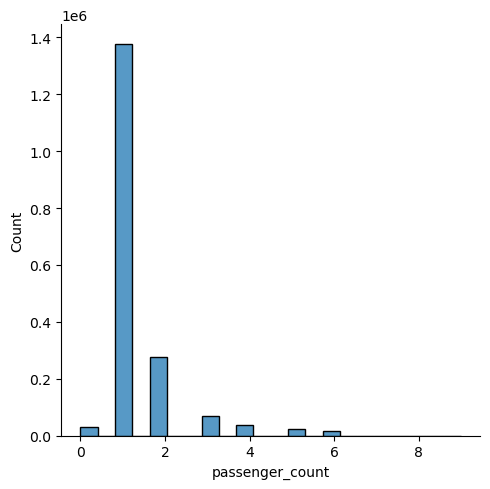

In [70]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print(df['passenger_count'].isnull().sum())
sns.displot(df['passenger_count'])

In [71]:
df['passenger_count'].mode()[0]

1.0

In [72]:
df['passenger_count']=df['passenger_count'].fillna(df['passenger_count'].mode()[0])

Did you find zeroes in passenger_count? Handle these.

In [74]:
df[df['passenger_count']==0].shape

(29681, 23)

In [75]:
df=df[df['passenger_count']>0]

In [76]:
df['passenger_count']=df['passenger_count'].apply(lambda x : int(x))
df['passenger_count'].value_counts()

passenger_count
1    1442041
2     277283
3      69032
4      38532
5      23871
6      15859
8         11
7          5
9          5
Name: count, dtype: int64

In [77]:
df.shape

(1866639, 23)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [84]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.unique()
df[df.RatecodeID.isnull()].isnull().sum()



VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
airport_fee              64874
PUdate                       0
PUhour                       0
PUyear                       0
PUmonth                      0
PUmday                       0
dtype: int64

In [87]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     1700677
2.0       70865
99.0      10437
5.0       10051
3.0        6043
4.0        3689
6.0           3
Name: count, dtype: int64

In [90]:
df[df['RatecodeID']==99.0].shape

(10437, 23)

In [92]:
df['RatecodeID'].isna().sum()

64874

In [94]:
df['RatecodeID']=df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

In [96]:
rc_mode=df['RatecodeID'].mode()[0]

In [98]:
df['RatecodeID']=df['RatecodeID'].apply(lambda x : x if x!=99.0 else rc_mode)


In [99]:
df['RatecodeID']=df['RatecodeID'].apply(lambda x : int(x))
df['RatecodeID'].value_counts()

RatecodeID
1    1775988
2      70865
5      10051
3       6043
4       3689
6          3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [102]:
df.congestion_surcharge.unique()

array([0. , 2.5, nan, 0.5])

In [103]:
# handle null values in congestion_surcharge
print(df['congestion_surcharge'].isnull().sum())
df['congestion_surcharge'].value_counts()


64874


congestion_surcharge
2.5    1663054
0.0     138710
0.5          1
Name: count, dtype: int64

In [104]:
df.congestion_surcharge.median()

2.5

In [106]:
df['congestion_surcharge']=df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [112]:
# Handle any remaining missing values

print(df.isnull().sum())


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              64874
PUdate                       0
PUhour                       0
PUyear                       0
PUmonth                      0
PUmday                       0
dtype: int64


In [114]:
df.airport_fee.unique()

array([1.25, 0.  ,  nan, 1.75, 1.  ])

In [116]:
df.airport_fee.value_counts()

airport_fee
0.00    1642511
1.75     119886
1.25      39367
1.00          1
Name: count, dtype: int64

In [118]:
df.airport_fee.median()

0.0

In [120]:
df['airport_fee']=df['airport_fee'].fillna(df['airport_fee'].median())

In [122]:
print(df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
PUdate                   0
PUhour                   0
PUyear                   0
PUmonth                  0
PUmday                   0
dtype: int64


In [124]:
df.shape

(1866639, 23)

In [126]:
df.VendorID.value_counts()

VendorID
2    1387715
1     478480
6        444
Name: count, dtype: int64

In [128]:
df=df[df['VendorID'].isin([1,2])]

In [129]:
df[df['passenger_count']==0].shape

(0, 23)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [134]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.866195e+06                     1866195                     1866195   
mean   1.743607e+00  2023-07-03 00:02:07.719872  2023-07-03 00:19:35.957624   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00         2023-04-02 18:21:18         2023-04-02 18:40:24   
50%    2.000000e+00         2023-06-27 19:40:46         2023-06-27 19:55:43   
75%    2.000000e+00  2023-10-06 23:48:01.500000  2023-10-07 00:04:38.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.366416e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.866195e+06   1.866195e+06  1.866195e+06  1.866195e+06   
mean      1.378240e+00   3.873600e+00  1.071931e+00  1.652243e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  6.000000e+00  2.650000e+02   
std       8.700428e-01   1.304506e+02  3.869828e-01  6.399043e+01   

       DOLocationID  payment_type   fare_amount  ...  tolls_amount  \
count  1.866195e+06  1.866195e+06  1.866195e+06  ...  1.866195e+06   
mean   1.640301e+02  1.162525e+00  1.995667e+01  ...  5.999430e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  ...  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  ...  0.000000e+00   
50%    1.620000e+02  1.000000e+00  1.350000e+01  ...  0.000000e+00   
75%    2.340000e+02  1.000000e+00  2.214000e+01  ...  0.000000e+00   
max    2.650000e+02  4.000000e+00  1.431635e+05  ...  1.430000e+02   
std    6.981718e+01  5.073498e-01  1.063665e+02  ...  2.193356e+00   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.866195e+06  1.866195e+06          1.866195e+06   
mean            9.992395e-01  2.903534e+01          2.314180e+00   
min             0.000000e+00  0.000000e+00          0.000000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  2.103000e+01          2.500000e+00   
75%             1.000000e+00  3.100000e+01          2.500000e+00   
max             1.000000e+00  1.431675e+05          2.500000e+00   
std             2.578179e-02  1.072428e+02          6.557601e-01   

        airport_fee                         PUdate        PUhour     PUyear  \
count  1.866195e+06                        1866195  1.866195e+06  1866195.0   
mean   1.387906e-01  2023-07-02 09:15:55.295026176  1.426898e+01     2023.0   
min    0.000000e+00            2023-01-01 00:00:00  0.000000e+00     2023.0   
25%    0.000000e+00            2023-04-02 00:00:00  1.100000e+01     2023.0   
50%    0.000000e+00            2023-06-27 00:00:00  1.500000e+01     2023.0   
75%    0.000000e+00            2023-10-06 00:00:00  1.900000e+01     2023.0   
max    1.750000e+00            2023-12-31 00:00:00  2.300000e+01     2023.0   
std    4.587332e-01                            NaN  5.814714e+00        0.0   

            PUmonth        PUmday  
count  1.866195e+06  1.866195e+06  
mean   6.545648e+00  1.551860e+01  
min    1.000000e+00  1.000000e+00  
25%    4.000000e+00  8.000000e+00  
50%    6.000000e+00  1.500000e+01  
75%    1.000000e+01  2.300000e+01  
max    1.200000e+01  3.100000e+01  
std    3.467939e+00  8.694964e+00  

[8 rows x 23 columns]

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866195 entries, 0 to 1896398
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  PUdate                 date

In [136]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1
   print("IQR is "+str(IQR))
   lb=  q1 - 1.5 * IQR
   ub=  q3 + 1.5 * IQR
   print("Lower Bound: "+ str(lb))
   print("Upper Bound: "+ str(ub))
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   
   return outliers

In [137]:
df_num = df.select_dtypes(include=[np.number])
df_num.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'PUhour',
       'PUyear', 'PUmonth', 'PUmday'],
      dtype='object')

In [138]:
chk_cols=['trip_distance','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']

for  col in chk_cols:
    print('CHECKING FOR OUTLIER IN  ===> ',col)
    outliers = find_outliers_IQR(df[col])    
    print("number of outliers: "+ str(outliers.shape[0]))    
    print("max outlier value: "+ str(outliers.max()))    
    print("min outlier value: "+ str(outliers.min()))

CHECKING FOR OUTLIER IN  ===>  trip_distance
IQR is 2.3499999999999996
Lower Bound: -2.4749999999999996
Upper Bound: 6.924999999999999
number of outliers: 246320
max outlier value: 126360.46
min outlier value: 6.93
CHECKING FOR OUTLIER IN  ===>  fare_amount
IQR is 12.84
Lower Bound: -9.959999999999997
Upper Bound: 41.4
number of outliers: 194792
max outlier value: 143163.45
min outlier value: 41.41
CHECKING FOR OUTLIER IN  ===>  extra
IQR is 2.5
Lower Bound: -3.75
Upper Bound: 6.25
number of outliers: 32941
max outlier value: 20.8
min outlier value: 6.75
CHECKING FOR OUTLIER IN  ===>  mta_tax
IQR is 0.0
Lower Bound: 0.5
Upper Bound: 0.5
number of outliers: 17536
max outlier value: 4.0
min outlier value: 0.0
CHECKING FOR OUTLIER IN  ===>  tip_amount
IQR is 3.45
Lower Bound: -4.175000000000001
Upper Bound: 9.625
number of outliers: 143307
max outlier value: 223.08
min outlier value: 9.63
CHECKING FOR OUTLIER IN  ===>  tolls_amount
IQR is 0.0
Lower Bound: 0.0
Upper Bound: 0.0
number of ou

In [139]:
df_temp=df[chk_cols]

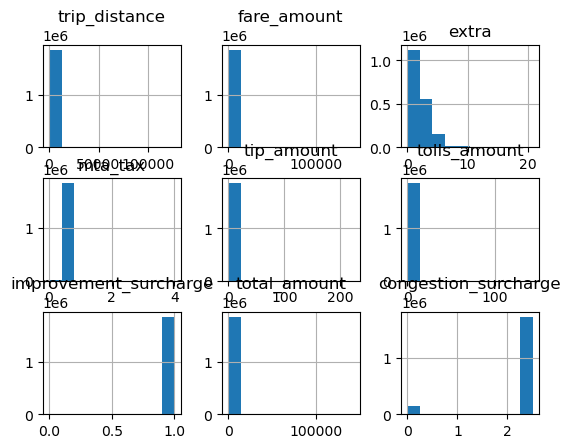

In [140]:
df_temp.hist(chk_cols)
plt.show()

In [141]:
df.shape

(1866195, 23)

<Axes: >

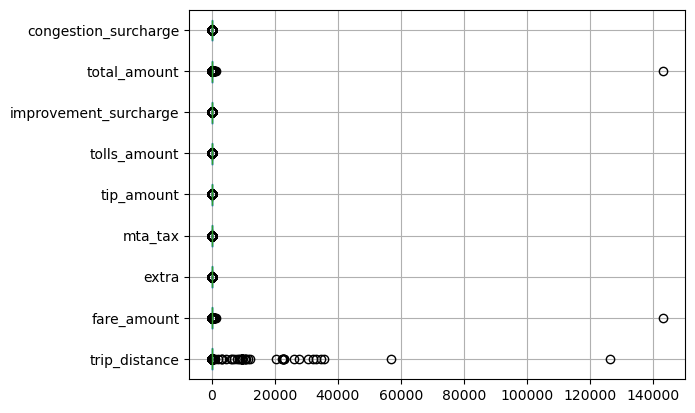

In [146]:
df_temp.boxplot(vert=False)  

In [149]:
#clean any unwanted dataframe from above code to free up memory
del [[df_temp,df_num]]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [155]:
df.passenger_count.value_counts()

passenger_count
1    1441597
2     277283
3      69032
4      38532
5      23871
6      15859
8         11
7          5
9          5
Name: count, dtype: int64

In [156]:
# remove passenger_count > 6
df=df[df['passenger_count'] <= 6]

In [157]:
# Continue with outlier handling
print(df[((df['trip_distance']<=0.5) & (df['fare_amount']>300)) ].shape)
print(df[((df['PULocationID']!=df['DOLocationID']) & (df['trip_distance']==0) & (df['fare_amount']==0))].shape)
print(df[(df['trip_distance']>250)].shape )
print(df[(df['payment_type']==0)].shape )

(34, 23)
(57, 23)
(46, 23)
(64430, 23)


In [158]:
df=df[~((df['trip_distance']<=0.5) & (df['fare_amount']>300)) ]
df=df[~((df['PULocationID']!=df['DOLocationID']) & (df['trip_distance']==0) & (df['fare_amount']==0))]
df=df[~(df['trip_distance']>250)]

In [159]:
print(df[(df['payment_type']==0)].shape )

(64400, 23)


In [160]:
df.payment_type.value_counts()

payment_type
1    1469206
2     310707
0      64400
4      13488
3       8236
Name: count, dtype: int64

In [161]:
df=df[df['payment_type']!=0]

In [162]:
df.payment_type.value_counts()

payment_type
1    1469206
2     310707
4      13488
3       8236
Name: count, dtype: int64

In [163]:
chk_cols=['fare_amount', 'total_amount','trip_distance']

for  col in chk_cols:
    print('CHECKING FOR OUTLIER IN  ===> ',col)
    outliers = find_outliers_IQR(df[col])    
    print("number of outliers: "+ str(outliers.shape[0]))    
    print("max outlier value: "+ str(outliers.max()))    
    print("min outlier value: "+ str(outliers.min()))


CHECKING FOR OUTLIER IN  ===>  fare_amount
IQR is 12.599999999999998
Lower Bound: -9.599999999999998
Upper Bound: 40.8
number of outliers: 189394
max outlier value: 143163.45
min outlier value: 40.9
CHECKING FOR OUTLIER IN  ===>  total_amount
IQR is 14.759999999999998
Lower Bound: -6.179999999999996
Upper Bound: 52.86
number of outliers: 212555
max outlier value: 143167.45
min outlier value: 52.87
CHECKING FOR OUTLIER IN  ===>  trip_distance
IQR is 2.33
Lower Bound: -2.435
Upper Bound: 6.885
number of outliers: 238666
max outlier value: 204.86
min outlier value: 6.89


IQR is 2.33
Lower Bound: -2.435
Upper Bound: 6.885
SHAPE AFTER CLEANING TRIP DISTANCE COL (1562971, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20d33d06fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d33d07500>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d33d06ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d33d07a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d33d07d40>],
 'means': []}

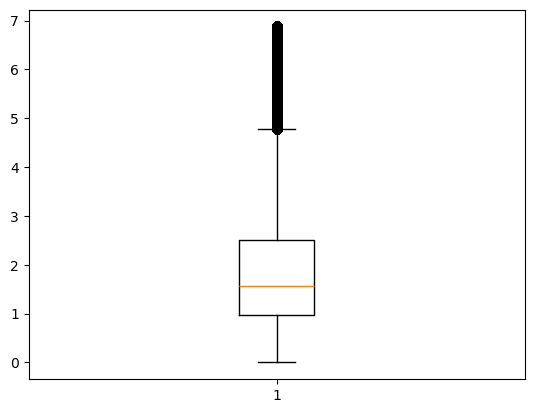

In [164]:
q1=df['trip_distance'].quantile(0.25)
q3=df['trip_distance'].quantile(0.75)
IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['trip_distance']<(q1-1.5*IQR)) | (df['trip_distance']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING TRIP DISTANCE COL",df.shape)
plt.boxplot(df['trip_distance'])

IQR is 9.1
Lower Bound: -5.049999999999999
Upper Bound: 31.349999999999998
SHAPE AFTER CLEANING fare_amount COL (1520186, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20d50856a80>,
 'caps': [<matplotlib.lines.Line2D at 0x20d50856f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d508567b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d50857500>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d50857770>],
 'means': []}

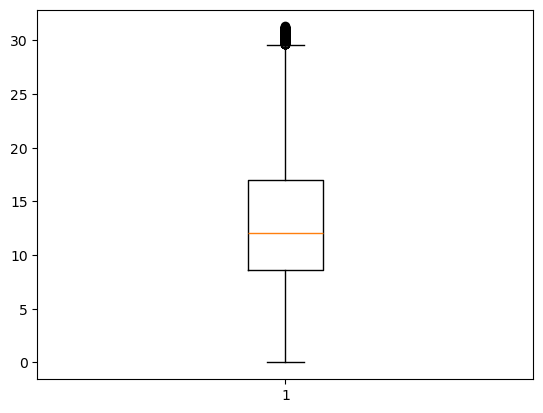

In [165]:
q1=df['fare_amount'].quantile(0.25)
q3=df['fare_amount'].quantile(0.75)
IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['fare_amount']<(q1-1.5*IQR)) | (df['fare_amount']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING fare_amount COL",df.shape)
plt.boxplot(df['fare_amount'])


IQR is 9.88
Lower Bound: 0.29999999999999893
Upper Bound: 39.82
SHAPE AFTER CLEANING total_amount COL (1493503, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20d5e7ed430>,
 'caps': [<matplotlib.lines.Line2D at 0x20d5e7ed970>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3a83ae70>],
 'medians': [<matplotlib.lines.Line2D at 0x20d5e7edf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d5e7ee1b0>],
 'means': []}

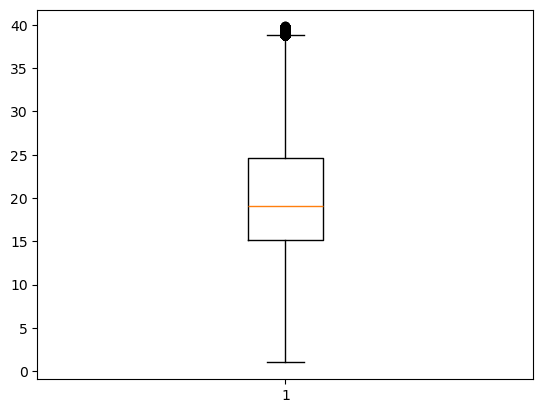

In [166]:
q1=df['total_amount'].quantile(0.25)
q3=df['total_amount'].quantile(0.75)
IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['total_amount']<(q1-1.5*IQR)) | (df['total_amount']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING total_amount COL",df.shape)
plt.boxplot(df['total_amount'])   

IQR is 0.0
Lower Bound: 0.0
Upper Bound: 0.0
SHAPE AFTER CLEANING tolls_amount COL (1490987, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20d328d1010>,
 'caps': [<matplotlib.lines.Line2D at 0x20d328d1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d328d0dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d328d1a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d503dafc0>],
 'means': []}

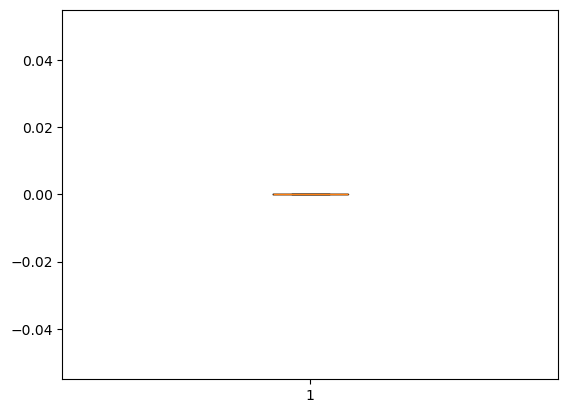

In [167]:
q1=df['tolls_amount'].quantile(0.25)
q3=df['tolls_amount'].quantile(0.75)
IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['tolls_amount']<(q1-1.5*IQR)) | (df['tolls_amount']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING tolls_amount COL",df.shape)
plt.boxplot(df['tolls_amount'])   

IQR is 2.78
Lower Bound: -3.17
Upper Bound: 7.949999999999999
SHAPE AFTER CLEANING tip_amount COL (1485032, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20dbe84a810>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3a8381d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20dbe849550>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3a8397c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d5e7eed20>],
 'means': []}

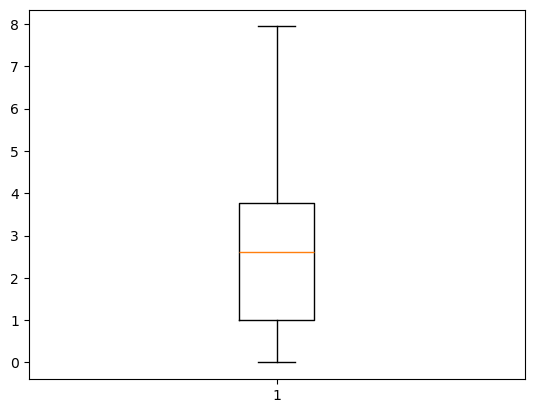

In [168]:
q1=df['tip_amount'].quantile(0.25)

q3=df['tip_amount'].quantile(0.75)

IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['tip_amount']<(q1-1.5*IQR)) | (df['tip_amount']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING tip_amount COL",df.shape)
plt.boxplot(df['tip_amount'])   

IQR is 2.5
Lower Bound: -3.75
Upper Bound: 6.25
SHAPE AFTER CLEANING extra COL (1483283, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20d1254bf80>,
 'caps': [<matplotlib.lines.Line2D at 0x20d1254af60>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d126ab950>],
 'medians': [<matplotlib.lines.Line2D at 0x20d1254b950>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d126bd5e0>],
 'means': []}

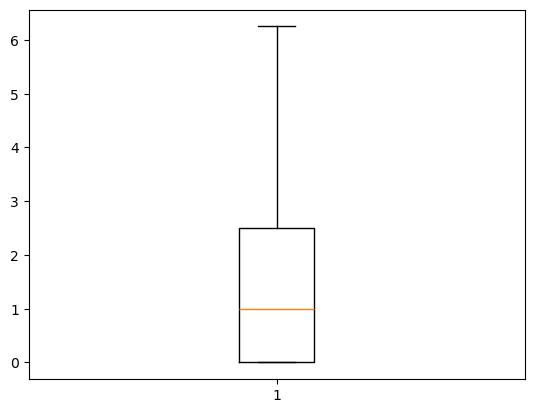

In [169]:
q1=df['extra'].quantile(0.25)

q3=df['extra'].quantile(0.75)

IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['extra']<(q1-1.5*IQR)) | (df['extra']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING extra COL",df.shape)
plt.boxplot(df['extra'])   

IQR is 0.0
Lower Bound: 0.0
Upper Bound: 0.0
SHAPE AFTER CLEANINGairport_fee COL (1471136, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20dbe84bec0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d125acfb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d125aecc0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d125ac9e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d125aeb10>],
 'means': []}

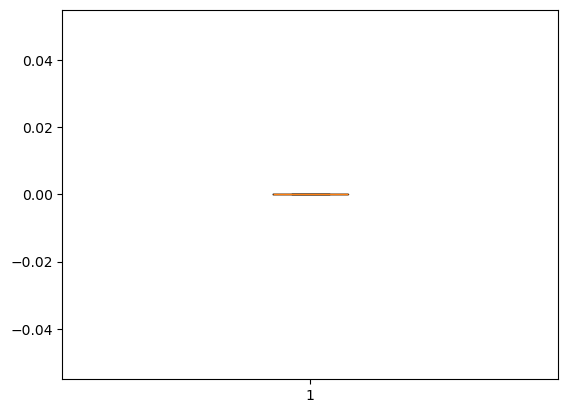

In [170]:
q1=df['airport_fee'].quantile(0.25)

q3=df['airport_fee'].quantile(0.75)

IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['airport_fee']<(q1-1.5*IQR)) | (df['airport_fee']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANINGairport_fee COL",df.shape)
plt.boxplot(df['airport_fee'])  

IQR is 0.0
Lower Bound: 0.5
Upper Bound: 0.5
SHAPE AFTER CLEANING mta_tax COL (1468059, 23)


{'whiskers': [<matplotlib.lines.Line2D at 0x20d12618a10>,
 'caps': [<matplotlib.lines.Line2D at 0x20d116c3b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d116c3aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d116c2510>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d116c21b0>],
 'means': []}

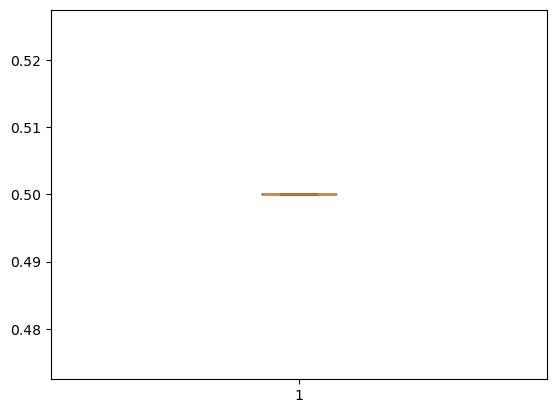

In [171]:
q1=df['mta_tax'].quantile(0.25)

q3=df['mta_tax'].quantile(0.75)

IQR=q3-q1
print("IQR is "+str(IQR))
lb=  q1 - 1.5 * IQR
ub=  q3 + 1.5 * IQR
print("Lower Bound: "+ str(lb))
print("Upper Bound: "+ str(ub))
cleaned = df[~((df['mta_tax']<(q1-1.5*IQR)) | (df['mta_tax']>(q3+1.5*IQR)))]
df=cleaned
print("SHAPE AFTER CLEANING mta_tax COL",df.shape)
plt.boxplot(df['mta_tax'])   

In [172]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday'],
      dtype='object')

<Axes: >

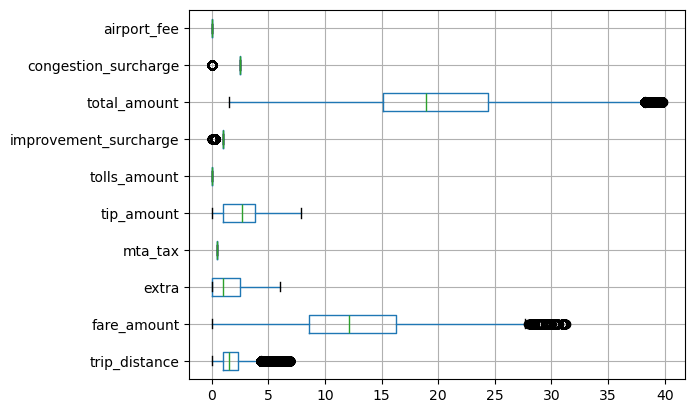

In [173]:
chk_cols=['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee']

df.boxplot(chk_cols,vert=False)

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'extra'}>,
        <Axes: title={'center': 'mta_tax'}>],
       [<Axes: title={'center': 'tip_amount'}>,
        <Axes: title={'center': 'tolls_amount'}>,
        <Axes: title={'center': 'improvement_surcharge'}>],
       [<Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'congestion_surcharge'}>,
        <Axes: title={'center': 'airport_fee'}>],
       [<Axes: title={'center': 'PUdate'}>,
        <Axes: title={'center': 'P

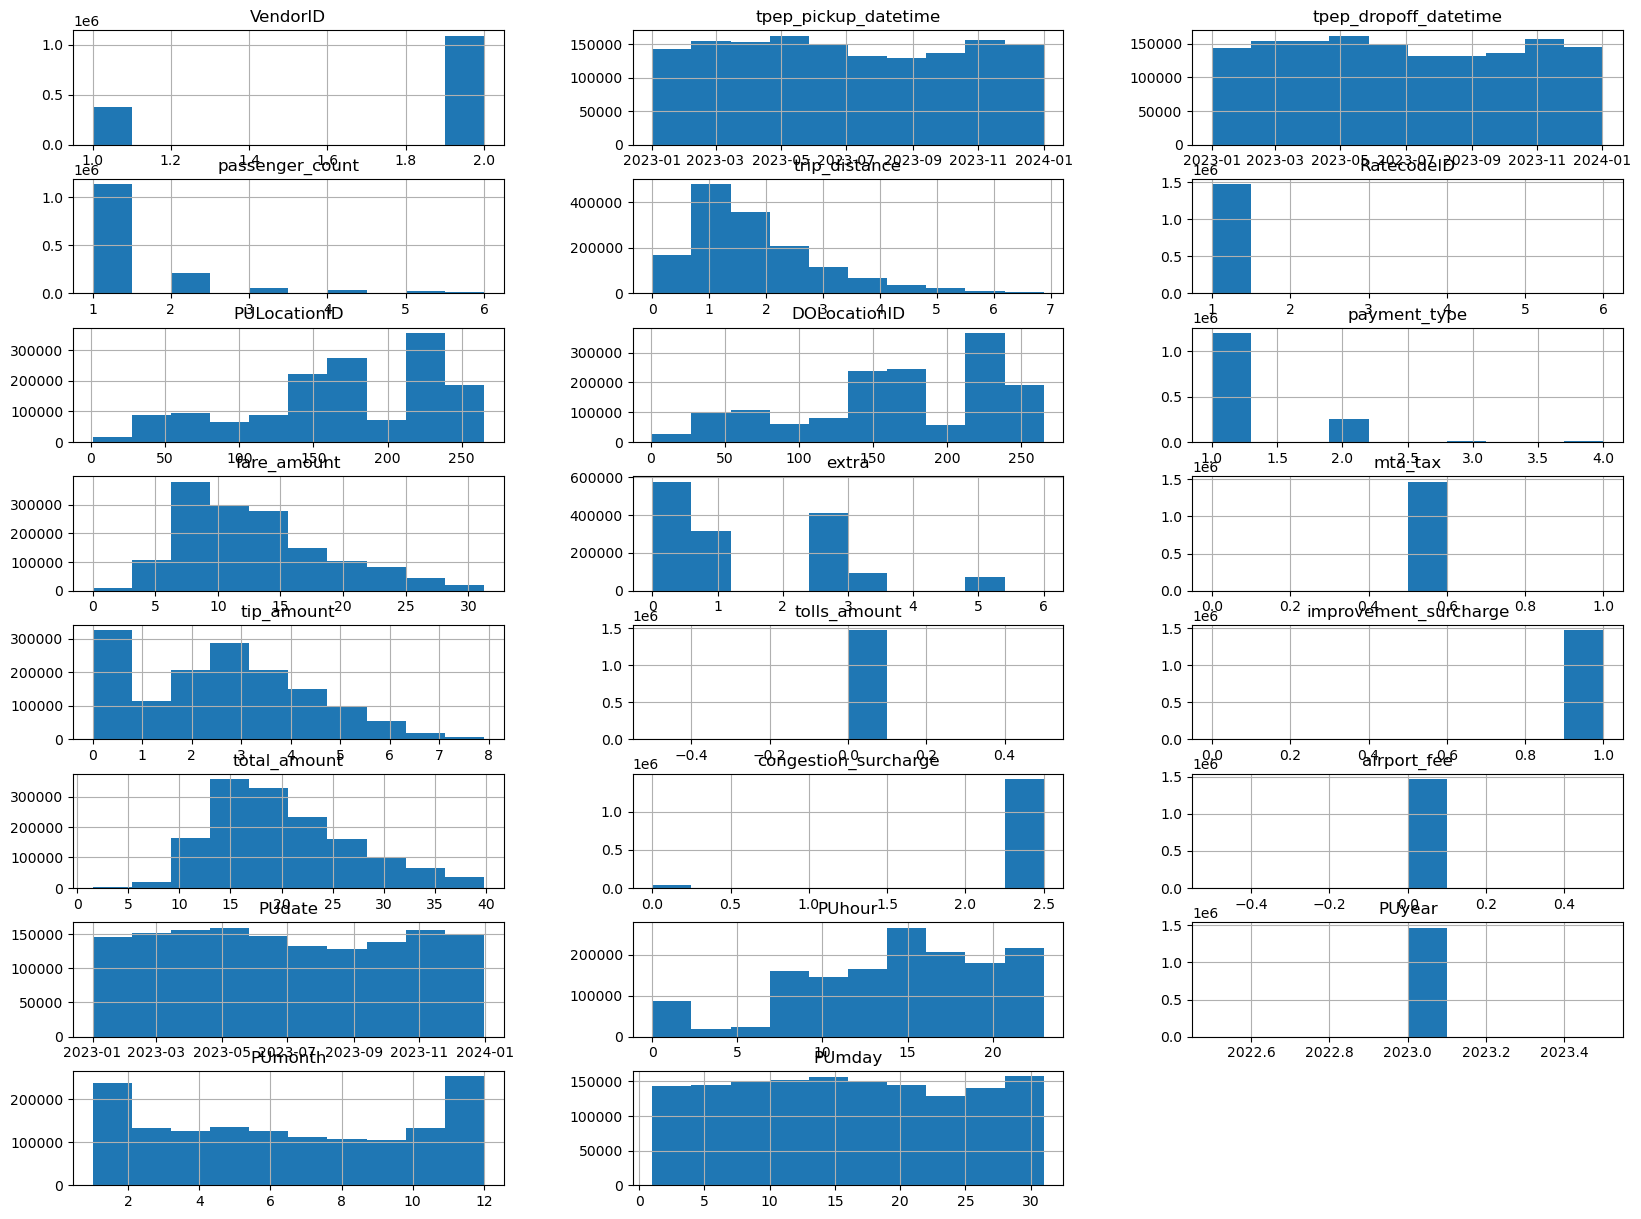

In [174]:
df.hist(layout=(8,3), figsize=(20,15))

In [175]:
df.shape

(1468059, 23)

In [176]:
# Do any columns need standardising?

#NO the numerical columns require standardising as they follow same units across

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [178]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'PUdate',
 'PUhour',
 'PUyear',
 'PUmonth',
 'PUmday']

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468059 entries, 1 to 1896398
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1468059 non-null  int64         
 1   tpep_pickup_datetime   1468059 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1468059 non-null  datetime64[us]
 3   passenger_count        1468059 non-null  int64         
 4   trip_distance          1468059 non-null  float64       
 5   RatecodeID             1468059 non-null  int64         
 6   PULocationID           1468059 non-null  int64         
 7   DOLocationID           1468059 non-null  int64         
 8   payment_type           1468059 non-null  int64         
 9   fare_amount            1468059 non-null  float64       
 10  extra                  1468059 non-null  float64       
 11  mta_tax                1468059 non-null  float64       
 12  tip_amount             1468059 no

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`Numerical
* `extra`Numerical
* `mta_tax`Numerical
* `tip_amount`Numerical
* `tolls_amount`Numerical
* `improvement_surcharge`Numerical
* `total_amount`Numerical
* `congestion_surcharge`Numerical
* `airport_fee`Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='PUhour'>

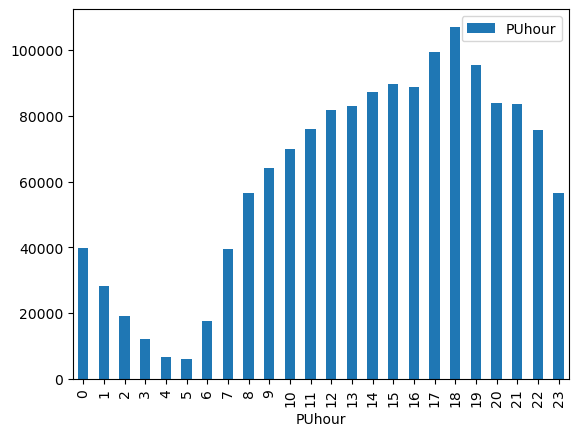

In [210]:
# Find and show the hourly trends in taxi pickups
df.groupby(['PUhour']).agg({'PUhour':'count'}).plot.bar()


<Axes: xlabel='weekday'>

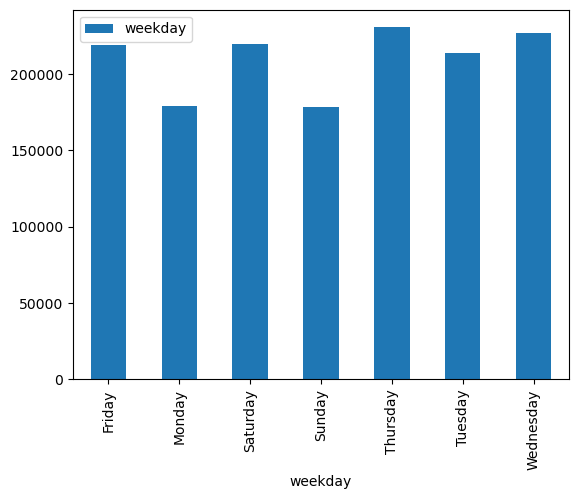

In [212]:
# Find and show the daily trends in taxi pickups (days of the week)
df['weekday']=df['tpep_pickup_datetime'].dt.day_name()
df.groupby(['weekday']).agg({'weekday':'count'}).plot.bar()


<Axes: xlabel='PUmonth'>

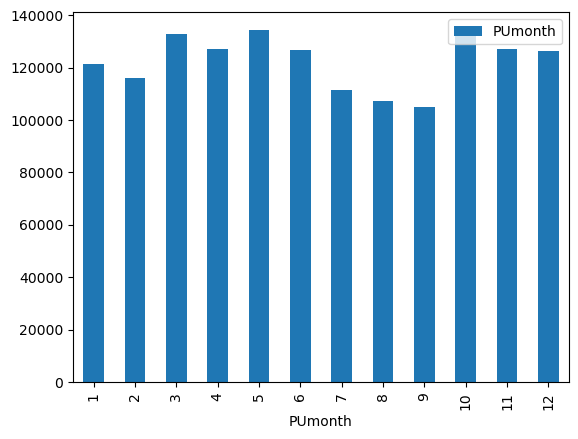

In [213]:
# Show the monthly trends in pickups
df.groupby(['PUmonth']).agg({'PUmonth':'count'}).plot.bar()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [218]:
# Analyse the above parameters

print(df.fare_amount.min())
print(df.tip_amount.min())
print(df.total_amount.min())
print(df.trip_distance.min())

0.0
0.0
1.5
0.0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [221]:
df_zero=df[((df['fare_amount']==0)|(df['tip_amount']==0)|(df['total_amount']==0)|(df['trip_distance']==0))]

In [223]:
df_zero.shape

(321202, 24)

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [226]:
# Create a df with non zero entries for the selected parameters.

df_nz=df[~((df['fare_amount']==0)|(df['tip_amount']==0)|(df['total_amount']==0))]

In [228]:
df_nz.shape

(1150473, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='PUmonth'>

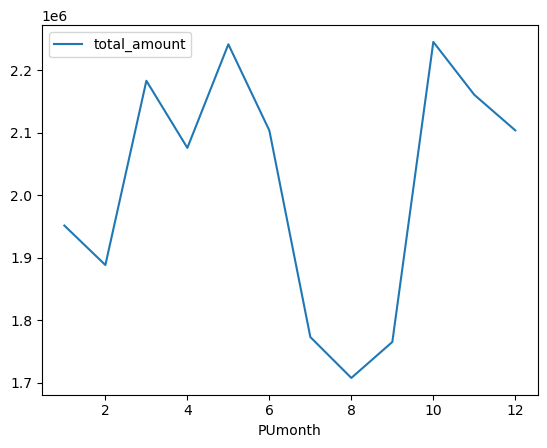

In [231]:
# Group data by month and analyse monthly revenue

df_nz.groupby(['PUmonth']).agg({'total_amount':'sum'}).plot()

In [233]:
top5_rev_mnths=df_nz.groupby(['PUmonth']).agg({'total_amount':'sum'}).sort_values('total_amount',ascending=False).reset_index()

Text(0.5, 1.0, 'Total Revenue by Month')

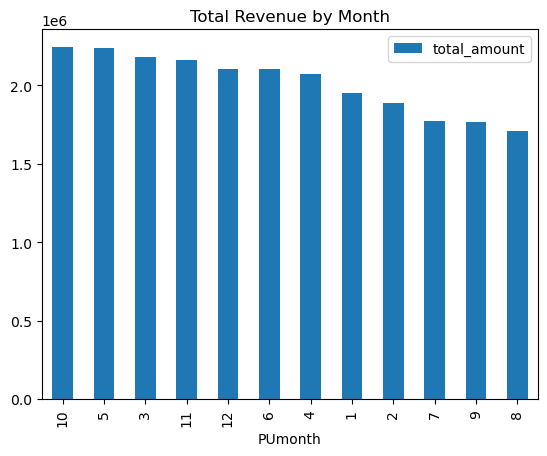

In [235]:
top5_rev_mnths.plot.bar(x='PUmonth',y='total_amount')
plt.title("Total Revenue by Month")

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [238]:
df_nz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150473 entries, 1 to 1896398
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1150473 non-null  int64         
 1   tpep_pickup_datetime   1150473 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1150473 non-null  datetime64[us]
 3   passenger_count        1150473 non-null  int64         
 4   trip_distance          1150473 non-null  float64       
 5   RatecodeID             1150473 non-null  int64         
 6   PULocationID           1150473 non-null  int64         
 7   DOLocationID           1150473 non-null  int64         
 8   payment_type           1150473 non-null  int64         
 9   fare_amount            1150473 non-null  float64       
 10  extra                  1150473 non-null  float64       
 11  mta_tax                1150473 non-null  float64       
 12  tip_amount             1150473 no

In [240]:
# Calculate proportion of each quarter
df_nz['quarter']=df_nz['tpep_pickup_datetime'].dt.quarter

In [242]:
df_nz.head()
df_nz.groupby(['PUyear']).agg({'total_amount':'sum'})


total_amount
PUyear              
2023     24198129.33

In [244]:
df_nz.total_amount.sum()

24198129.330000002

In [246]:
df_nz.groupby(['PUyear','quarter']).agg({'total_amount':'sum'})

total_amount
PUyear quarter              
2023   1          6022600.85
       2          6420588.64
       3          5245460.05
       4          6509479.79

In [248]:
Q_prop=df_nz.groupby(['PUyear','quarter']).agg({'total_amount':'sum'}).div(df_nz.total_amount.sum())

In [250]:
Q_prop.reset_index(inplace=True)

In [252]:
Q_prop.columns=['PUyear','quarter','q_propotion_tot_amt']

In [254]:
Q_prop

PUyear  quarter  q_propotion_tot_amt
0    2023        1             0.248887
1    2023        2             0.265334
2    2023        3             0.216771
3    2023        4             0.269008

Text(0.5, 1.0, 'Revenue Proportion  from each Quarter')

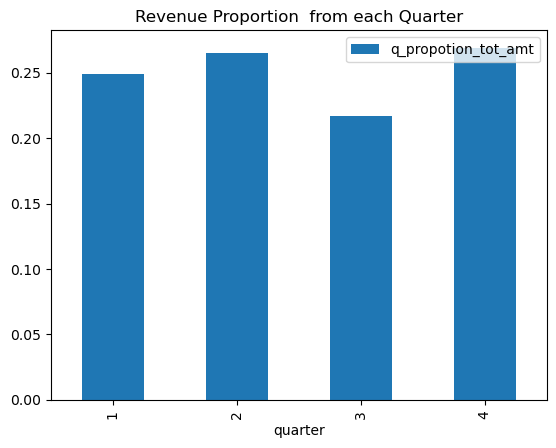

In [256]:
Q_prop.plot.bar(x='quarter',y='q_propotion_tot_amt')
plt.title('Revenue Proportion  from each Quarter')

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [259]:
df_nz.trip_distance.min()

0.0

In [261]:
df_nz.fare_amount.min()

0.17

In [263]:
df_nz2=df_nz[df_nz['trip_distance']!=0]

In [265]:
#clean any unwanted dataframe from above code to free up memory
del [[df_zero,df_nz]]

In [267]:

correlation = df_nz2['trip_distance'].corr(df_nz2['fare_amount'])
print(f"trip_distance & fare_amount Correlation value: {correlation}")


trip_distance & fare_amount Correlation value: 0.8730162500149997


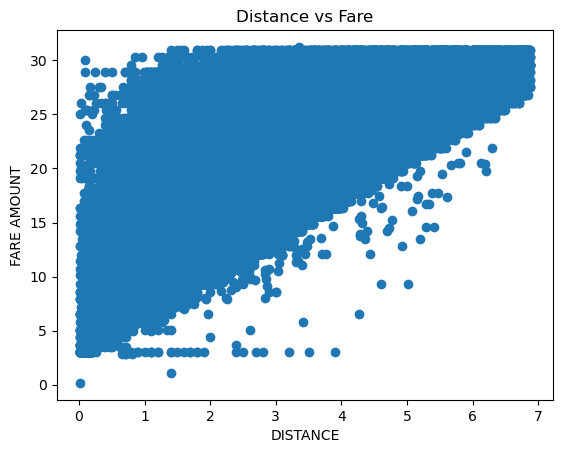

In [269]:
# Show how trip fare is affected by distance
plt.scatter(x=df_nz2['trip_distance'],y=df_nz2['fare_amount'])
plt.title("Distance vs Fare")
plt.xlabel('DISTANCE')
plt.ylabel('FARE AMOUNT')
plt.show()

In [270]:
#dataframe with trip distance zero was used only for 3.1.6
#Below sections will use dataframe prior to excluding trip_distance zero

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [272]:


df_nz2['trip_duration_mins']=(df_nz2['tpep_dropoff_datetime']-df_nz2['tpep_pickup_datetime']).dt.total_seconds()/60

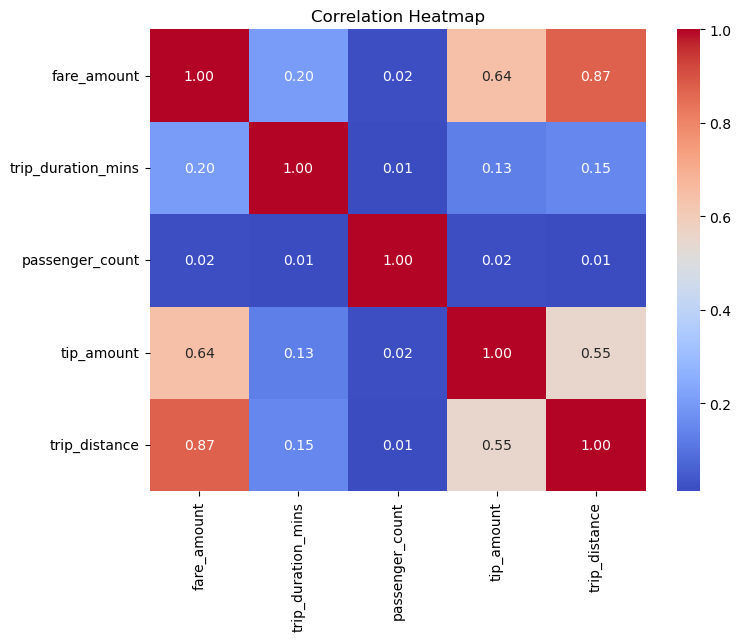

In [273]:
# Calculate the correlation matrix
correlation_matrix = df_nz2[['fare_amount','trip_duration_mins','passenger_count','tip_amount','trip_distance']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

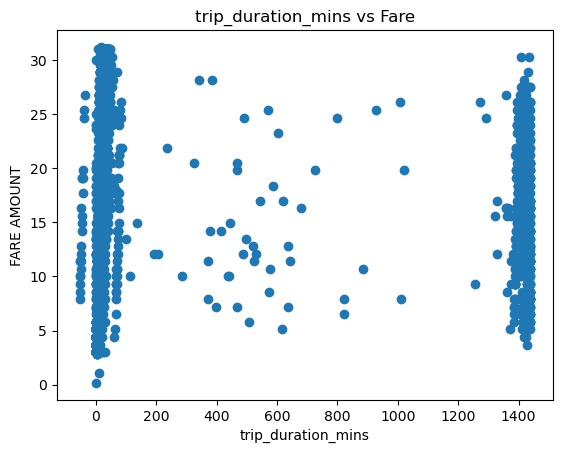

In [274]:
# Show relationship between fare and trip duration
plt.scatter(x=df_nz2['trip_duration_mins'],y=df_nz2['fare_amount'])
plt.title("trip_duration_mins vs Fare")
plt.xlabel('trip_duration_mins')
plt.ylabel('FARE AMOUNT')
plt.show()

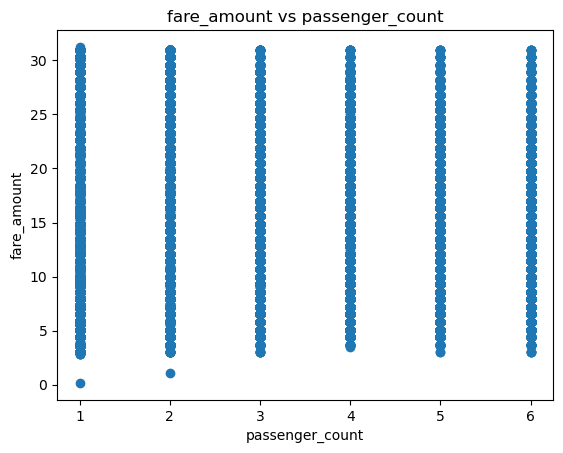

In [275]:
# Show relationship between fare and number of passengers

plt.scatter(x=df_nz2['passenger_count'],y=df_nz2['fare_amount'])
plt.title("fare_amount vs passenger_count")
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')
plt.show()

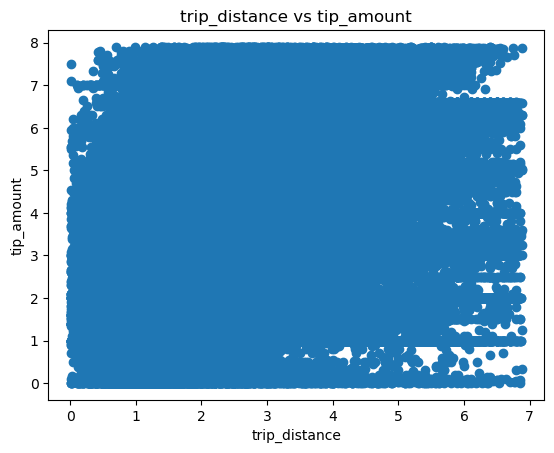

In [276]:
# Show relationship between tip and trip distance

plt.scatter(x=df_nz2['trip_distance'],y=df_nz2['tip_amount'])
plt.title("trip_distance vs tip_amount")
plt.xlabel('trip_distance')
plt.ylabel('tip_amount')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [282]:
df_nz2['payment_type'].value_counts()

payment_type
1    1146825
2         18
4         10
3          4
Name: count, dtype: int64

In [283]:
# Analyse the distribution of different payment types (payment_type).

dist_percent=pd.DataFrame(df_nz2.groupby(['payment_type']).agg({'payment_type':'count'}).div(len(df_nz2['payment_type']))*100)


In [284]:
dist_percent.columns=['distribution']
dist_percent.reset_index()

payment_type  distribution
0             1     99.997210
1             2      0.001570
2             3      0.000349
3             4      0.000872

<Axes: xlabel='payment_type'>

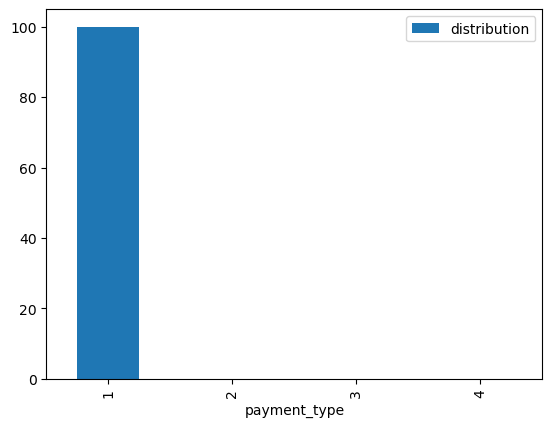

In [286]:
dist_percent.plot.bar()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [297]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [300]:
import geopandas as gpd


# Read the shapefile using geopandas
fpath='D:\\Priya_Study\\UPGRAD_Masters_AIML\\AIML_Main_course\\05_ EDA on NYC Taxi Records\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp'
zones =gpd.read_file(fpath)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

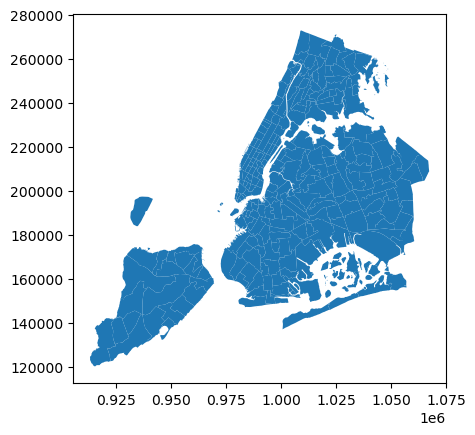

In [303]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [307]:
zones.duplicated().sum()

0

In [309]:
# Merge zones and trip records using locationID and PULocationID

master_df=pd.merge(df_nz2, zones, left_on='PULocationID', right_on='LocationID' ,how='left')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [312]:
# Group data by location and calculate the number of trips

trip_by_location=master_df.groupby('LocationID').agg({'LocationID':'count'})

In [314]:
trip_by_location.columns=['Trips_count']

In [316]:
trip_by_location.reset_index()

LocationID  Trips_count
0           1.0            1
1           4.0         1276
2           7.0          197
3           9.0            1
4          10.0            2
..          ...          ...
176       258.0            1
177       260.0           36
178       261.0         4835
179       262.0        17428
180       263.0        25245

[181 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [319]:
# Merge trip counts back to the zones GeoDataFrame

zones_tc=pd.merge(zones, trip_by_location, on='LocationID' ,how='left')


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [324]:
zones_tc[zones_tc.Trips_count==zones_tc.Trips_count.max()]

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   

       borough                                           geometry  Trips_count  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...      65030.0

Text(0.5, 1.0, 'TRIPS COUNT BY ZONE')

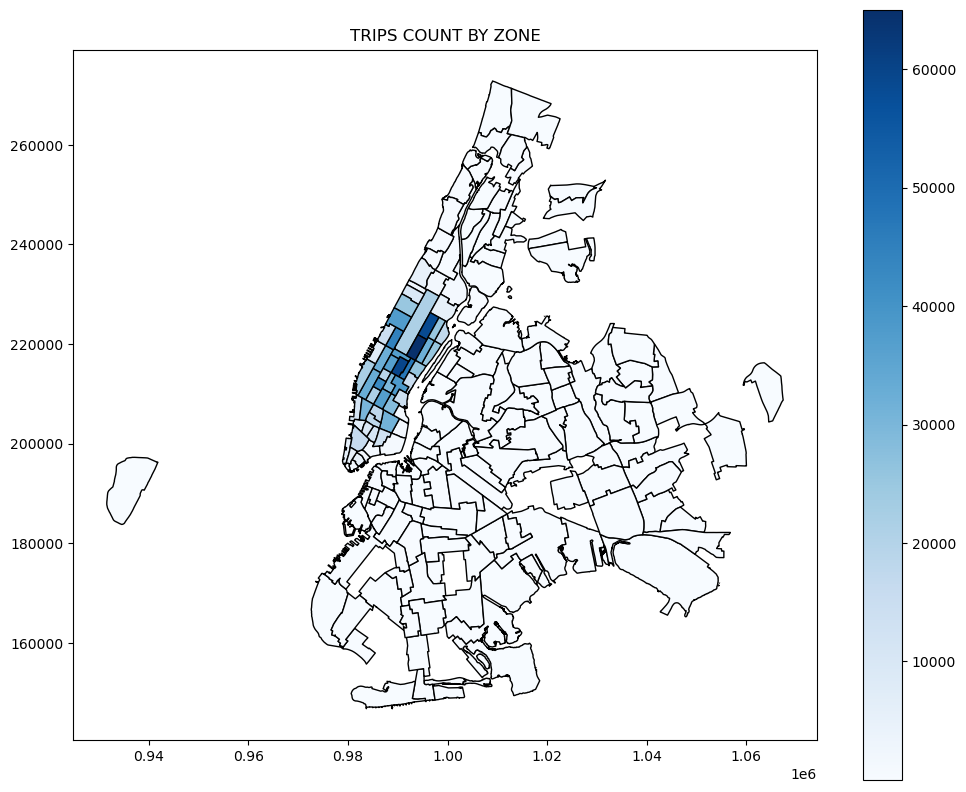

In [326]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_tc.plot(ax=ax, column='Trips_count', cmap='Blues', edgecolor='k', legend=True)
ax.set_title("TRIPS COUNT BY ZONE")

In [328]:
# can you try displaying the zones DF sorted by the number of trips?
zones_tc=zones_tc.sort_values(by=['Trips_count'],ascending=False)

In [330]:
zones_tc.reset_index()

index  OBJECTID  Shape_Leng  Shape_Area                      zone  \
0      236       237    0.042213    0.000096     Upper East Side South   
1      160       161    0.035804    0.000072            Midtown Center   
2      235       236    0.044252    0.000103     Upper East Side North   
3      161       162    0.035270    0.000048              Midtown East   
4      141       142    0.038176    0.000076       Lincoln Square East   
..     ...       ...         ...         ...                       ...   
258    250       251    0.137711    0.000626               Westerleigh   
259    251       252    0.158004    0.001025                Whitestone   
260    252       253    0.036051    0.000078             Willets Point   
261    253       254    0.085886    0.000360  Williamsbridge/Olinville   
262    258       259    0.126750    0.000395        Woodlawn/Wakefield   

     LocationID        borough  \
0           237      Manhattan   
1           161      Manhattan   
2           236      Manhattan   
3           162      Manhattan   
4           142      Manhattan   
..          ...            ...   
258         251  Staten Island   
259         252         Queens   
260         253         Queens   
261         254          Bronx   
262         259          Bronx   

                                              geometry  Trips_count  
0    POLYGON ((993633.442 216961.016, 993507.232 21...      65030.0  
1    POLYGON ((991081.026 214453.698, 990952.644 21...      59859.0  
2    POLYGON ((995940.048 221122.92, 995812.322 220...      58504.0  
3    POLYGON ((992224.354 214415.293, 992096.999 21...      47005.0  
4    POLYGON ((989380.305 218980.247, 989359.803 21...      44871.0  
..                                                 ...          ...  
258  POLYGON ((947868.004 169247.734, 948000.981 16...          NaN  
259  POLYGON ((1033946.683 231157.996, 1033973.166 ...          NaN  
260  POLYGON ((1028825.348 218121.42, 1029152.461 2...          NaN  
261  POLYGON ((1025214.477 259577.301, 1025348.099 ...          NaN  
262  POLYGON ((1025414.782 270986.139, 1025138.624 ...          NaN  

[263 rows x 9 columns]

<Axes: xlabel='zone'>

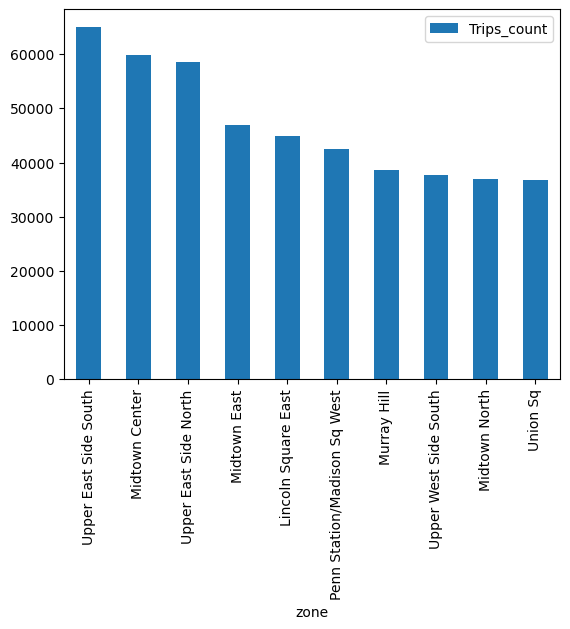

In [332]:
zones_tc.head(10).plot.bar('zone','Trips_count')

In [334]:
zones_tc.Trips_count.max()

65030.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [344]:
master_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [346]:
master_df=master_df.drop(['LocationID'],axis=1)

In [348]:
master_df=master_df.rename({'zone':'PUzone'},axis=1)

In [349]:
master_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough',
       'geometry'],
      dtype='object')

In [352]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [354]:
zone_id_name=zones[['LocationID','zone']]

In [356]:
zone_id_name=zone_id_name.drop_duplicates()

In [358]:
master_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough',
       'geometry'],
      dtype='object')

In [360]:
master_df=master_df.merge(zone_id_name,left_on='DOLocationID',right_on='LocationID',how='left')

In [362]:
master_df=master_df.drop(['LocationID'],axis=1)

In [364]:
master_df=master_df.rename({'zone':'DOzone'},axis=1)

In [366]:
master_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone'],
      dtype='object')

In [368]:
# Find routes which have the slowest speeds at different times of the day

master_df.head()
#master_df['avg_trp_duration']=
master_df['route_id']=master_df['PULocationID'].astype(str) + '_TO_ ' +master_df['DOLocationID'].astype(str)
master_df['route_name']=master_df['PUzone'].astype(str) + '_TO_ ' +master_df['DOzone'].astype(str)


In [369]:
master_df['trip_duration_mins']=master_df['trip_duration_mins'].apply(lambda x : abs(x))

In [370]:
trip_duration_zonewise=master_df.groupby(['route_id','PUhour']).agg({'trip_duration_mins':'mean'}).reset_index()

In [373]:
trip_duration_zonewise.columns=['route_id','PUhour','avg_trip_duration_mins']

In [376]:
master_df2=master_df.merge(trip_duration_zonewise,left_on=['route_id','PUhour'],right_on=['route_id','PUhour'],how='left')

In [377]:
master_df2['speed']=master_df2['trip_distance']/master_df2['avg_trip_duration_mins']

In [380]:
master_df2.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35                2   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24           1           161           237             1   
1           1.59           1            79           164             1   
2           3.16           1            79           256             1   
3           0.90           1           148           114             1   
4           2.78           1            79           186             1   

   fare_amount  ...  Shape_Leng  Shape_Area           PUzone    borough  \
0          7.9  ...    0.035804    0.000072   Midtown Center  Manhattan   
1         11.4  ...    0.042625    0.000108     East Village  Manhattan   
2         19.1  ...    0.042625    0.000108     East Village  Manhattan   
3          7.9  ...    0.039131    0.000070  Lower East Side  Manhattan   
4         19.8  ...    0.042625    0.000108     East Village  Manhattan   

                                            geometry  \
0  POLYGON ((991081.026 214453.698, 990952.644 21...   
1  POLYGON ((988746.067 202151.955, 988733.885 20...   
2  POLYGON ((988746.067 202151.955, 988733.885 20...   
3  POLYGON ((988552.836 201677.665, 988387.669 20...   
4  POLYGON ((988746.067 202151.955, 988733.885 20...   

                         DOzone     route_id  \
0         Upper East Side South  161_TO_ 237   
1                 Midtown South   79_TO_ 164   
2     Williamsburg (South Side)   79_TO_ 256   
3       Greenwich Village South  148_TO_ 114   
4  Penn Station/Madison Sq West   79_TO_ 186   

                                      route_name avg_trip_duration_mins  \
0       Midtown Center_TO_ Upper East Side South               6.747917   
1                 East Village_TO_ Midtown South              10.490299   
2     East Village_TO_ Williamsburg (South Side)              16.892105   
3    Lower East Side_TO_ Greenwich Village South               7.835417   
4  East Village_TO_ Penn Station/Madison Sq West              12.057407   

      speed  
0  0.183760  
1  0.151569  
2  0.187070  
3  0.114863  
4  0.230564  

[5 rows x 37 columns]

In [382]:
#clean any unwanted dataframe from above code to free up memory
del [[master_df]]

In [384]:
temp_df=master_df2[['route_id','route_name','PUzone','DOzone','tpep_pickup_datetime','tpep_dropoff_datetime','weekday','PUhour','trip_distance','trip_duration_mins','avg_trip_duration_mins','speed']]

In [386]:
temp_df.sort_values(by=['speed'],ascending=True)
temp_df.reset_index(drop=True)

route_id                                      route_name  \
0        161_TO_ 237        Midtown Center_TO_ Upper East Side South   
1         79_TO_ 164                  East Village_TO_ Midtown South   
2         79_TO_ 256      East Village_TO_ Williamsburg (South Side)   
3        148_TO_ 114     Lower East Side_TO_ Greenwich Village South   
4         79_TO_ 186   East Village_TO_ Penn Station/Madison Sq West   
...              ...                                             ...   
1146855  237_TO_ 143   Upper East Side South_TO_ Lincoln Square West   
1146856  231_TO_ 231   TriBeCa/Civic Center_TO_ TriBeCa/Civic Center   
1146857   158_TO_ 68  Meatpacking/West Village West_TO_ East Chelsea   
1146858  161_TO_ 162                 Midtown Center_TO_ Midtown East   
1146859   231_TO_ 68           TriBeCa/Civic Center_TO_ East Chelsea   

                                PUzone                        DOzone  \
0                       Midtown Center         Upper East Side South   
1                         East Village                 Midtown South   
2                         East Village     Williamsburg (South Side)   
3                      Lower East Side       Greenwich Village South   
4                         East Village  Penn Station/Madison Sq West   
...                                ...                           ...   
1146855          Upper East Side South           Lincoln Square West   
1146856           TriBeCa/Civic Center          TriBeCa/Civic Center   
1146857  Meatpacking/West Village West                  East Chelsea   
1146858                 Midtown Center                  Midtown East   
1146859           TriBeCa/Civic Center                  East Chelsea   

        tpep_pickup_datetime tpep_dropoff_datetime   weekday  PUhour  \
0        2023-01-01 00:16:41   2023-01-01 00:21:46    Sunday       0   
1        2023-01-01 00:58:00   2023-01-01 01:08:31    Sunday       0   
2        2023-01-01 00:16:06   2023-01-01 00:31:59    Sunday       0   
3        2023-01-01 00:15:25   2023-01-01 00:22:35    Sunday       0   
4        2023-01-01 00:24:48   2023-01-01 00:45:04    Sunday       0   
...                      ...                   ...       ...     ...   
1146855  2023-09-30 23:38:39   2023-09-30 23:48:00  Saturday      23   
1146856  2023-09-30 23:46:34   2023-09-30 23:53:20  Saturday      23   
1146857  2023-09-30 23:44:51   2023-09-30 23:49:05  Saturday      23   
1146858  2023-09-30 23:11:05   2023-09-30 23:18:42  Saturday      23   
1146859  2023-09-30 23:19:47   2023-09-30 23:33:36  Saturday      23   

         trip_distance  trip_duration_mins  avg_trip_duration_mins     speed  
0                 1.24            5.083333                6.747917  0.183760  
1                 1.59           10.516667               10.490299  0.151569  
2                 3.16           15.883333               16.892105  0.187070  
3                 0.90            7.166667                7.835417  0.114863  
4                 2.78           20.266667               12.057407  0.230564  
...                ...                 ...                     ...       ...  
1146855           1.63            9.350000                9.125556  0.178619  
1146856           0.79            6.766667                5.228788  0.151087  
1146857           0.50            4.233333                5.921429  0.084439  
1146858           1.09            7.616667                6.071377  0.179531  
1146859           2.97           13.816667               11.690741  0.254047  

[1146860 rows x 12 columns]

In [387]:
avg_speed_by_route_hr=temp_df.groupby(['PUhour','route_id']).agg({'speed':'mean'})

In [388]:
avg_speed_by_route_hr.head()

speed
PUhour route_id             
0      100_TO_ 100  0.103379
       100_TO_ 107  0.149794
       100_TO_ 112  0.262048
       100_TO_ 113  0.166421
       100_TO_ 114  0.202941

In [390]:
avg_speed_by_route_hr=avg_speed_by_route_hr.reset_index()

In [394]:
avg_speed_by_route_hr.head()

PUhour     route_id     speed
0       0  100_TO_ 100  0.103379
1       0  100_TO_ 107  0.149794
2       0  100_TO_ 112  0.262048
3       0  100_TO_ 113  0.166421
4       0  100_TO_ 114  0.202941

In [396]:
avg_speed_by_route_hr.columns=['PUhour','route_id','avg_speed']

In [398]:
temp_df2=temp_df.merge(avg_speed_by_route_hr,left_on=['PUhour','route_id'],right_on=['PUhour','route_id'],how='left')

In [400]:
temp_df2.columns

Index(['route_id', 'route_name', 'PUzone', 'DOzone', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'weekday', 'PUhour', 'trip_distance',
       'trip_duration_mins', 'avg_trip_duration_mins', 'speed', 'avg_speed'],
      dtype='object')

In [402]:
temp_df2['trip_time_vs_avg_time']=temp_df2['trip_duration_mins']/temp_df2['avg_trip_duration_mins']
temp_df2['trip_speed_vs_avg_speed']=temp_df2['speed']/temp_df2['avg_speed']

In [404]:
#identify top 5 slow routes based on trip duration criteria
temp_df2.sort_values(by='trip_time_vs_avg_time',ascending=False).head(5).route_name.value_counts() 

route_name
Upper East Side North_TO_ Upper East Side North    3
Upper East Side South_TO_ Upper East Side South    1
Upper East Side South_TO_ Upper East Side North    1
Name: count, dtype: int64

In [405]:
#identify top 5 slow routes based on speed criteria
temp_df2.sort_values('trip_speed_vs_avg_speed').reset_index().head(5).route_name.value_counts()

route_name
Greenwich Village North_TO_ Battery Park City           1
Clinton East_TO_ Lenox Hill West                        1
Midtown North_TO_ Kips Bay                              1
Penn Station/Madison Sq West_TO_ Lincoln Square East    1
Times Sq/Theatre District_TO_ Upper West Side South     1
Name: count, dtype: int64

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [410]:
master_df2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed'],
      dtype='object')

In [412]:
# Visualise the number of trips per hour and find the busiest hour
trips_by_ymdhr=master_df2.groupby(['PUhour', 'PUyear', 'PUmonth', 'PUmday']).agg({'PUhour':'count'})
trips_by_hr=master_df2.groupby(['PUhour']).agg({'PUhour':'count'})

In [414]:
trips_by_ymdhr.columns=['trips_count']
trips_by_hr.columns=['trips_count']

In [416]:
trips_by_ymdhr=trips_by_ymdhr.reset_index()
trips_by_hr=trips_by_hr.reset_index()

In [418]:
trips_by_hr=trips_by_hr.sort_values(['trips_count','PUhour'],ascending=False)

In [420]:
trips_by_hr.head(5)

PUhour  trips_count
18      18        86254
17      17        78840
19      19        77351
21      21        68369
20      20        68192

In [422]:
trips_by_hr.trips_count.sum()

1146860

<Axes: xlabel='PUhour'>

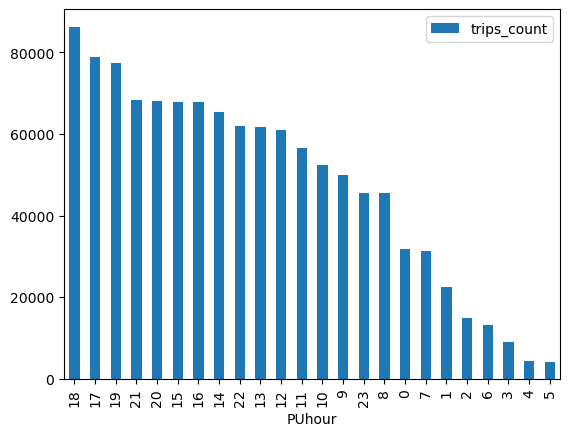

In [424]:
trips_by_hr.plot.bar('PUhour','trips_count')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [428]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.5

trips_by_ymdhr['trips_count_scaled']=(trips_by_ymdhr['trips_count']/sample_fraction).astype(int)

In [430]:
trips_by_ymdhr

PUhour  PUyear  PUmonth  PUmday  trips_count  trips_count_scaled
0          0    2023        1       1          148                 296
1          0    2023        1       2           18                  36
2          0    2023        1       3           16                  32
3          0    2023        1       4           26                  52
4          0    2023        1       5           46                  92
...      ...     ...      ...     ...          ...                 ...
8670      23    2023       12      27           65                 130
8671      23    2023       12      28           78                 156
8672      23    2023       12      29          115                 230
8673      23    2023       12      30          123                 246
8674      23    2023       12      31           79                 158

[8675 rows x 6 columns]

In [432]:
trips_by_ymdhr.trips_count.sum() #  Before Scaling 

1146860

In [434]:
trips_by_ymdhr.trips_count_scaled.sum()  #  After Scaling 

2293720

In [436]:
busy_hrs=trips_by_ymdhr.groupby('PUhour').agg({'trips_count_scaled':'sum'})

In [438]:
busy_hrs.columns=['Total_trips_by_hr']

In [440]:
busy_hrs.head()

Total_trips_by_hr
PUhour                   
0                   63704
1                   45004
2                   29744
3                   18156
4                    8724

In [442]:
busy_hrs=busy_hrs.reset_index()

In [444]:
busy_hrs.head()

PUhour  Total_trips_by_hr
0       0              63704
1       1              45004
2       2              29744
3       3              18156
4       4               8724

In [446]:
busy_hrs=busy_hrs.sort_values(by=['Total_trips_by_hr','PUhour'],ascending=False)

In [448]:
busy_hrs=busy_hrs.reset_index()

In [450]:
busy_hrs.head()

index  PUhour  Total_trips_by_hr
0     18      18             172508
1     17      17             157680
2     19      19             154702
3     21      21             136738
4     20      20             136384

<Axes: xlabel='PUhour'>

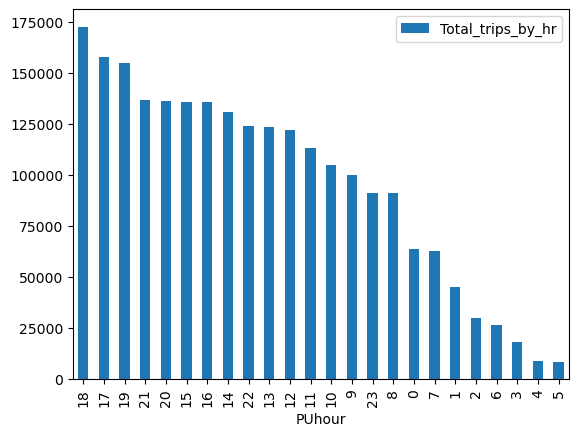

In [452]:
busy_hrs.plot.bar('PUhour','Total_trips_by_hr')

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [455]:
# Compare traffic trends for the week days and weekends

master_df2.columns
master_df2['weekday'].value_counts()

weekday
Thursday     182827
Wednesday    180513
Saturday     170022
Friday       169532
Tuesday      169037
Monday       137786
Sunday       137143
Name: count, dtype: int64

In [457]:
master_df2['weekend_flag']=master_df2['weekday'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

In [458]:
master_df2['weekend_flag'].value_counts()

weekend_flag
0    839695
1    307165
Name: count, dtype: int64

In [461]:
master_df3=master_df2.merge(trips_by_ymdhr,on=['PUhour', 'PUyear', 'PUmonth', 'PUmday'],how='left')

In [462]:
master_df3.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled'],
      dtype='object')

<Axes: xlabel='weekday', ylabel='trips_count'>

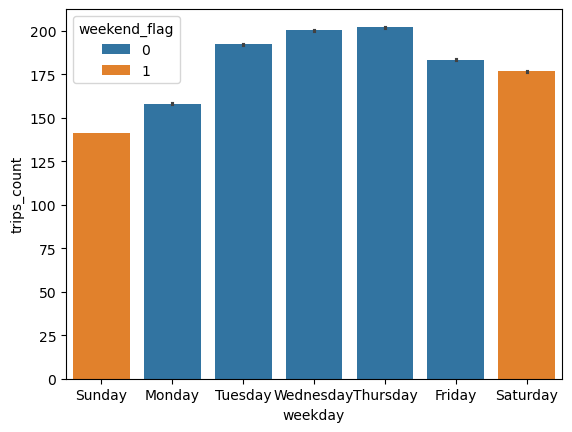

In [465]:
sns.barplot(master_df3,x='weekday',y='trips_count',hue='weekend_flag')

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [468]:
master_df3.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled'],
      dtype='object')

In [469]:
# Find top 10 pickup and dropoff zones
master_df3['trip']=1 # including to calculate sum of each records as per grouping 
hrly_PUtrip=master_df3.groupby(['PUzone','PUhour']).agg({'trip':'sum'})
hrly_PUtrip.columns=['PU_trip_count']
hrly_PUtrip=hrly_PUtrip.reset_index()

In [470]:
hrly_PUtrip.head()

PUzone  PUhour  PU_trip_count
0  Alphabet City       0            175
1  Alphabet City       1            209
2  Alphabet City       2            186
3  Alphabet City       3            119
4  Alphabet City       4             21

In [475]:
master_df3=master_df3.merge(hrly_PUtrip,on=['PUzone','PUhour'],how='left')

In [476]:
master_df3.shape

(1146860, 42)

In [479]:
master_df3.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35                2   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24           1           161           237             1   
1           1.59           1            79           164             1   
2           3.16           1            79           256             1   
3           0.90           1           148           114             1   
4           2.78           1            79           186             1   

   fare_amount  ...                        DOzone     route_id  \
0          7.9  ...         Upper East Side South  161_TO_ 237   
1         11.4  ...                 Midtown South   79_TO_ 164   
2         19.1  ...     Williamsburg (South Side)   79_TO_ 256   
3          7.9  ...       Greenwich Village South  148_TO_ 114   
4         19.8  ...  Penn Station/Madison Sq West   79_TO_ 186   

                                      route_name  avg_trip_duration_mins  \
0       Midtown Center_TO_ Upper East Side South                6.747917   
1                 East Village_TO_ Midtown South               10.490299   
2     East Village_TO_ Williamsburg (South Side)               16.892105   
3    Lower East Side_TO_ Greenwich Village South                7.835417   
4  East Village_TO_ Penn Station/Madison Sq West               12.057407   

      speed  weekend_flag  trips_count  trips_count_scaled trip  PU_trip_count  
0  0.183760             1          148                 296    1          955.0  
1  0.151569             1          148                 296    1         2738.0  
2  0.187070             1          148                 296    1         2738.0  
3  0.114863             1          148                 296    1         1491.0  
4  0.230564             1          148                 296    1         2738.0  

[5 rows x 42 columns]

In [481]:
top_10_zones_PU=hrly_PUtrip.groupby(['PUzone']).agg({'PU_trip_count':'sum'}).reset_index().sort_values(['PU_trip_count'],ascending=False).reset_index(drop=True).head(10)

In [483]:
top_10_zones_PU.PU_trip_count.sum()

467955

In [485]:
top_10_zones_PU

PUzone  PU_trip_count
0         Upper East Side South          65030
1                Midtown Center          59859
2         Upper East Side North          58504
3                  Midtown East          47005
4           Lincoln Square East          44871
5  Penn Station/Madison Sq West          42594
6                   Murray Hill          38596
7         Upper West Side South          37687
8                 Midtown North          36953
9                      Union Sq          36856

In [487]:
top_10_PU_list=list(top_10_zones_PU.PUzone.unique())

In [489]:
top_10_PU_list

['Upper East Side South',
 'Midtown Center',
 'Upper East Side North',
 'Midtown East',
 'Lincoln Square East',
 'Penn Station/Madison Sq West',
 'Murray Hill',
 'Upper West Side South',
 'Midtown North',
 'Union Sq']

In [491]:

master_df3['DOhour'] = master_df3['tpep_dropoff_datetime'].dt.hour
hrly_DOtrip=master_df3.groupby(['DOzone','DOhour']).agg({'trip':'sum'})
hrly_DOtrip.columns=['DO_trip_count']
hrly_DOtrip=hrly_DOtrip.reset_index()
top_10_zones_DO=hrly_DOtrip.groupby(['DOzone']).agg({'DO_trip_count':'sum'}).reset_index().sort_values(['DO_trip_count'],ascending=False).reset_index(drop=True).head(10)

In [493]:
top_10_zones_DO.DO_trip_count.sum()

420129

In [495]:
top_10_zones_DO

DOzone  DO_trip_count
0  Upper East Side North          61669
1  Upper East Side South          58172
2         Midtown Center          48852
3            Murray Hill          38721
4  Upper West Side South          37850
5    Lincoln Square East          37844
6           Midtown East          36405
7        Lenox Hill West          36191
8               Union Sq          32328
9           East Chelsea          32097

In [497]:
master_df3=master_df3.merge(hrly_DOtrip,on=['DOzone','DOhour'],how='left')

In [498]:
master_df3.shape

(1146860, 44)

In [501]:
top_10_DO_list=list(top_10_zones_DO.DOzone.unique())

In [503]:
hrly_PUtrip.shape

(2338, 3)

In [505]:
hrly_PUtrip.PU_trip_count.sum()

1137510

In [507]:
hrly_DOtrip.DO_trip_count.sum()

1136596

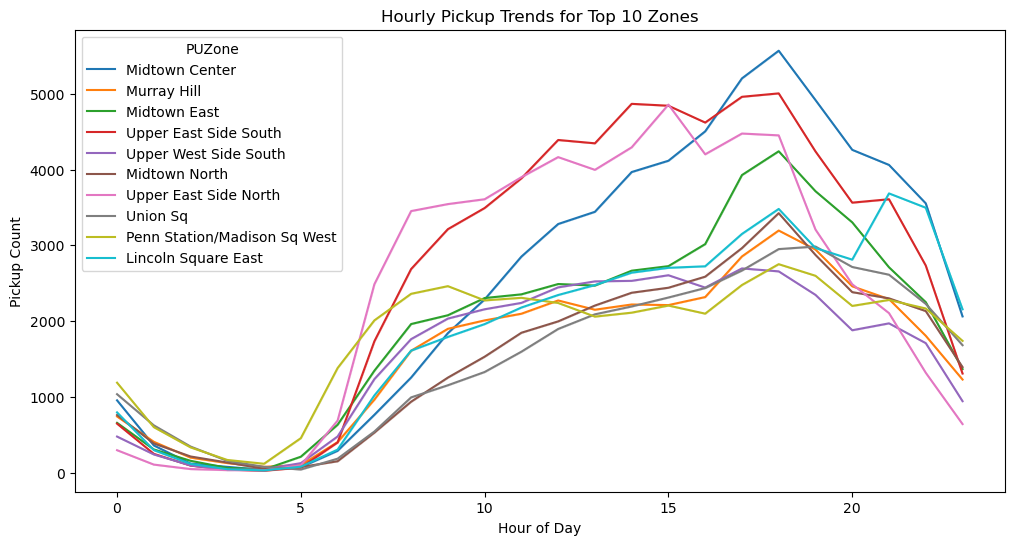

In [509]:

master_df_PUtop=master_df3[master_df3['PUzone'].isin(top_10_PU_list)]
plt.figure(figsize=(12, 6))
sns.lineplot(master_df_PUtop, x='PUhour', y='PU_trip_count', hue='PUzone')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Count')
plt.legend(title='PUZone')
plt.show()


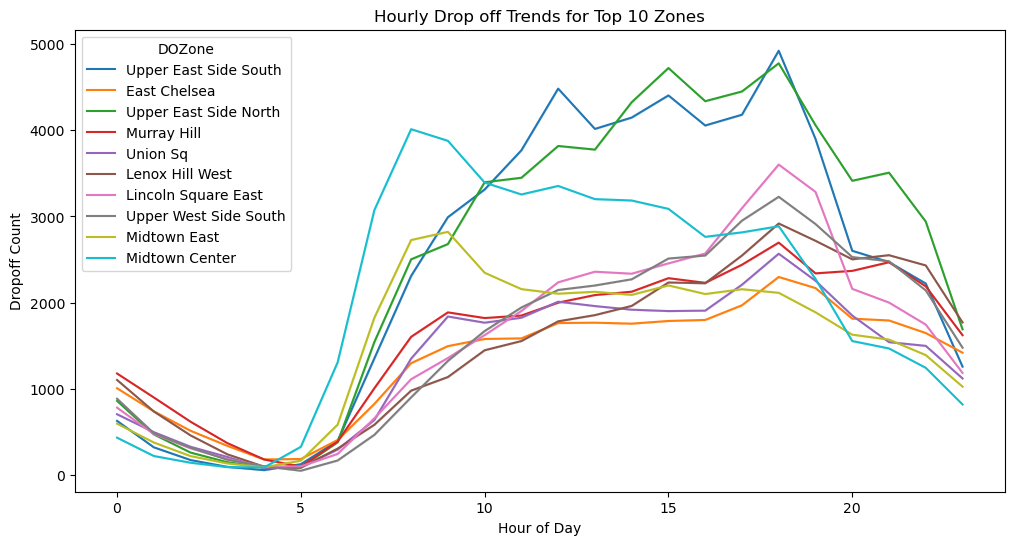

In [510]:
master_df_DOtop=master_df3[master_df3['DOzone'].isin(top_10_DO_list)]
plt.figure(figsize=(12, 6))
sns.lineplot(master_df_DOtop, x='DOhour', y='DO_trip_count', hue='DOzone')
plt.title('Hourly Drop off Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Dropoff Count')
plt.legend(title='DOZone')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [512]:
#delete unwanted dataframe from above  code run to clean up memory 
del [[master_df2]]


In [572]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
zone_PU=pd.DataFrame(master_df3)


In [574]:
zone_PU['zone']=zone_PU['PUzone']

In [576]:
zone_PU.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled', 'trip',
       'PU_trip_count', 'DOhour', 'DO_trip_count', 'zone'],
      dtype='object')

In [578]:
zone_PU=zone_PU[['zone','PU_trip_count']]

In [580]:
zone_PU=zone_PU.drop_duplicates()

In [582]:
zone_PU=zone_PU.groupby('zone').agg({'PU_trip_count':'sum'}).reset_index()

In [584]:
zone_PU.columns

Index(['zone', 'PU_trip_count'], dtype='object')

In [586]:
zone_PU.duplicated().sum()

0

In [588]:
zone_PU['zone'].shape

(181,)

In [590]:
zone_PU.PU_trip_count.sum()

1123840.0

In [592]:
zone_DO=master_df3[['DOzone','DO_trip_count']]

In [594]:
zone_DO=zone_DO.drop_duplicates()

In [596]:
zone_DO=zone_DO.groupby('DOzone').agg({'DO_trip_count':'sum'}).reset_index()

In [598]:
zone_DO.columns

Index(['DOzone', 'DO_trip_count'], dtype='object')

In [600]:
zone_DO.duplicated().sum()

0

In [602]:
zone_DO.DO_trip_count.sum()

1125283.0

In [604]:
zone_DO['DOzone'].shape

(205,)

In [606]:
zone_PU_DO=zone_PU.merge(zone_DO,left_on=['zone'],right_on=['DOzone'],how='left')
zone_PU_DO.columns

Index(['zone', 'PU_trip_count', 'DOzone', 'DO_trip_count'], dtype='object')

In [608]:
zone_PU_DO=zone_PU_DO.drop(['DOzone'],axis=1)

In [610]:
zone_PU_DO.shape

(181, 3)

In [612]:
zone_PU_DO.duplicated().sum()

0

In [614]:
zone_PU_DO=zone_PU_DO.drop_duplicates()

In [616]:
zone_PU_DO.shape

(181, 3)

In [618]:
zone_PU_DO.head()

zone  PU_trip_count  DO_trip_count
0  Alphabet City         1238.0         4651.0
1        Astoria          105.0         1476.0
2     Auburndale            1.0            1.0
3   Baisley Park            1.0           10.0
4     Bath Beach            1.0            NaN

In [620]:
zone_PU_DO['PU_DO_ratio']=zone_PU_DO['PU_trip_count']/zone_PU_DO['DO_trip_count']

In [622]:
zone_PU_DO=zone_PU_DO.dropna()

In [624]:
top10_PU_DO_ratio=zone_PU_DO.sort_values(['PU_DO_ratio'],ascending=False).reset_index(drop=True).head(10)

<Axes: xlabel='zone'>

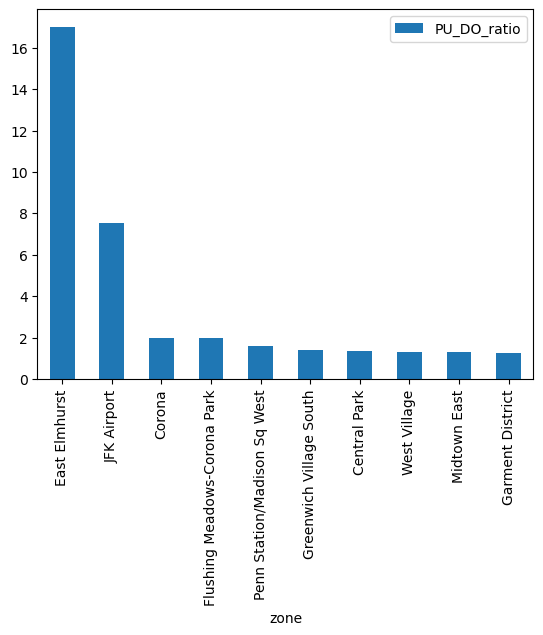

In [626]:
top10_PU_DO_ratio.plot.bar('zone','PU_DO_ratio')

In [628]:
bottom10_PU_DO_ratio=zone_PU_DO.sort_values(['PU_DO_ratio'],ascending=True).reset_index(drop=True).head(10)

In [630]:
bottom10_PU_DO_ratio

zone  PU_trip_count  DO_trip_count  PU_DO_ratio
0                   Steinway            6.0          248.0     0.024194
1             Bushwick South            6.0          240.0     0.025000
2   Washington Heights North            7.0          224.0     0.031250
3           Roosevelt Island           10.0          319.0     0.031348
4              Melrose South            1.0           30.0     0.033333
5         Stuyvesant Heights            6.0          136.0     0.044118
6  Prospect-Lefferts Gardens            3.0           60.0     0.050000
7                Old Astoria           22.0          432.0     0.050926
8            Columbia Street            3.0           58.0     0.051724
9               Clinton Hill           23.0          432.0     0.053241

<Axes: xlabel='zone'>

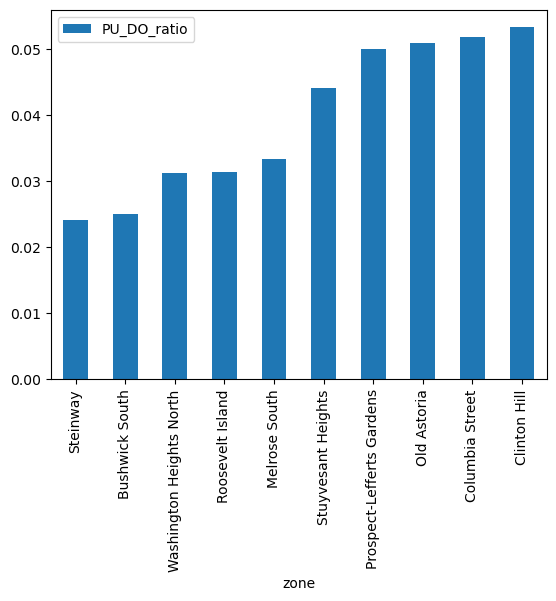

In [632]:
bottom10_PU_DO_ratio.plot.bar('zone','PU_DO_ratio')

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [635]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hrs_PUtraffic=master_df3[ (master_df3['PUhour']>=23) | (master_df3['PUhour']<=5)]


In [637]:
night_hrs_PUtraffic.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled', 'trip',
       'PU_trip_count', 'DOhour', 'DO_trip_count'],
      dtype='object')

In [639]:
night_hrs_PUtraffic=night_hrs_PUtraffic[['PUzone','PU_trip_count']]

In [641]:
night_hrs_PUtraffic=night_hrs_PUtraffic.drop_duplicates()

In [643]:
ngt_PUtraffic_top=night_hrs_PUtraffic.groupby('PUzone').agg({'PU_trip_count':'sum'}).reset_index().sort_values('PU_trip_count',ascending=False).head(10)

In [645]:
ngt_PUtraffic_top=ngt_PUtraffic_top.reset_index(drop=True)

In [647]:
ngt_PUtraffic_top

PUzone  PU_trip_count
0                  East Village        11583.0
1                  West Village         9296.0
2               Lower East Side         7086.0
3                  Clinton East         6950.0
4       Greenwich Village South         6582.0
5     Times Sq/Theatre District         4807.0
6  Penn Station/Madison Sq West         4605.0
7                 Midtown South         4218.0
8                      Gramercy         4172.0
9                  East Chelsea         4009.0

Text(0.5, 1.0, 'Night Pickup trip count by Zone')

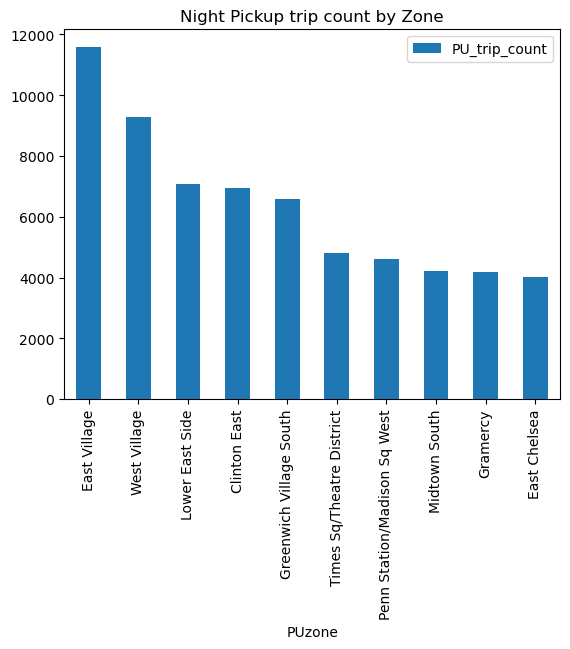

In [649]:
ngt_PUtraffic_top.plot.bar('PUzone','PU_trip_count')
plt.title('Night Pickup trip count by Zone')

In [650]:
night_hrs_DOtraffic=master_df3[(master_df3['DOhour']>=23) |(master_df3['DOhour']<=5)]

In [653]:
night_hrs_DOtraffic=night_hrs_DOtraffic[['DOzone','DO_trip_count']]

In [655]:
night_hrs_DOtraffic=night_hrs_DOtraffic.drop_duplicates()

In [657]:
ngt_DOtraffic_top=night_hrs_DOtraffic.groupby('DOzone').agg({'DO_trip_count':'sum'}).reset_index().sort_values('DO_trip_count',ascending=False).head(10)

In [659]:
ngt_DOtraffic_top=ngt_DOtraffic_top.reset_index(drop=True)

In [661]:
ngt_DOtraffic_top

DOzone  DO_trip_count
0                   East Village         6735.0
1                   Clinton East         4974.0
2                    Murray Hill         4952.0
3                       Gramercy         4854.0
4                Lenox Hill West         4477.0
5                   East Chelsea         4368.0
6                   West Village         4191.0
7                 Yorkville West         4007.0
8  Sutton Place/Turtle Bay North         3651.0
9          Upper East Side North         3505.0

Text(0.5, 1.0, 'Night Dropoff trip count by Zone')

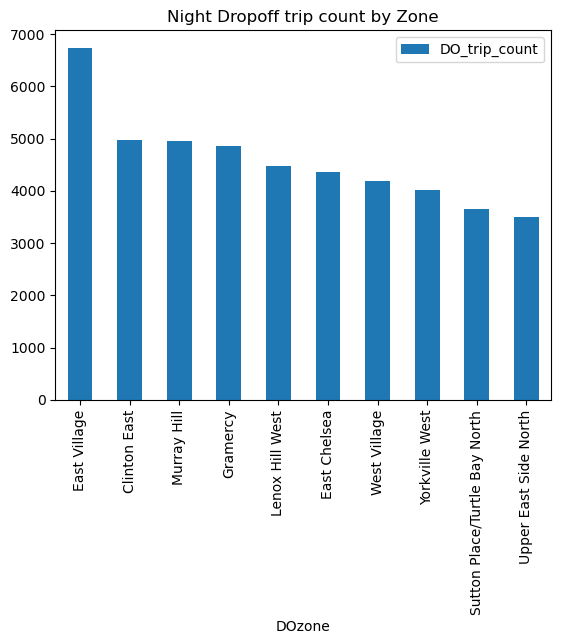

In [663]:
ngt_DOtraffic_top.plot.bar('DOzone','DO_trip_count')
plt.title('Night Dropoff trip count by Zone')

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [666]:
# Filter for night hours (11 PM to 5 AM)

night_hrs_traffic=master_df3[ (master_df3['PUhour']>=23) | (master_df3['PUhour']<=5) |(master_df3['DOhour']>=23) |(master_df3['DOhour']<=5)]

In [668]:
day_hrs_traffic=master_df3[ ~((master_df3['PUhour']>=23) | (master_df3['PUhour']<=5) |(master_df3['DOhour']>=23) |(master_df3['DOhour']<=5))]

In [669]:
total_rev=master_df3['total_amount'].sum()

In [670]:
night_rev=night_hrs_traffic['total_amount'].sum()

In [674]:
day_rev=day_hrs_traffic['total_amount'].sum()

In [676]:
master_df3.shape

(1146860, 44)

In [678]:
night_hrs_traffic.shape

(143440, 44)

In [680]:
day_hrs_traffic.shape

(1003420, 44)

In [682]:
night_rev_shr=round((night_rev/total_rev)*100,2)
print("Percent of Night revenue share: ",night_rev_shr)

Percent of Night revenue share:  12.81


In [684]:
day_rev_shr=round((day_rev/total_rev)*100,2)

In [686]:
print("Percent of Day revenue share: ",day_rev_shr)

Percent of Day revenue share:  87.19


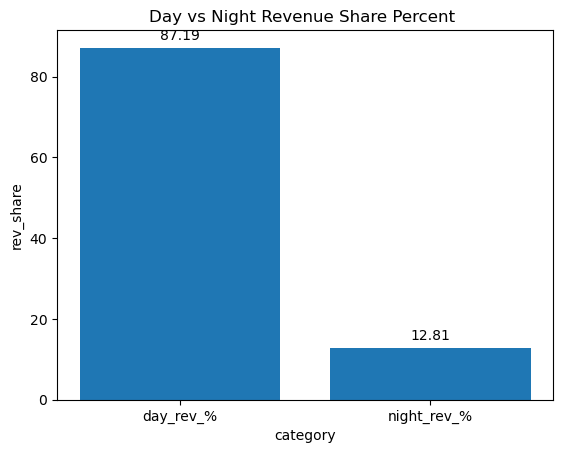

In [688]:
category = ['day_rev_%', 'night_rev_%']
rev_share = [day_rev_shr,night_rev_shr]

plt.bar(category,rev_share)
plt.title('Day vs Night Revenue Share Percent ')
plt.xlabel('category')
plt.ylabel('rev_share')

for i, value in enumerate(rev_share):
    plt.text(i, value + 2, str(value), ha='center') 
    
plt.show()

In [690]:
#clean up unwanted dataframes to free memory 
del [[night_hrs_traffic,day_hrs_traffic,night_hrs_DOtraffic,night_hrs_PUtraffic]]

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [694]:

master_df3.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled', 'trip',
       'PU_trip_count', 'DOhour', 'DO_trip_count'],
      dtype='object')

In [696]:
# Analyse the fare per mile per passenger for different passenger counts

master_df3['fare_per_mile']=master_df3['total_amount'].div(master_df3['trip_distance'])
avg_fare=master_df3.groupby('passenger_count').agg({'fare_per_mile':'mean'}).reset_index()

In [698]:
master_df3[master_df3['trip_distance']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, PUdate, PUhour, PUyear, PUmonth, PUmday, weekday, quarter, trip_duration_mins, OBJECTID, Shape_Leng, Shape_Area, PUzone, borough, geometry, DOzone, route_id, route_name, avg_trip_duration_mins, speed, weekend_flag, trips_count, trips_count_scaled, trip, PU_trip_count, DOhour, DO_trip_count, fare_per_mile]
Index: []

[0 rows x 45 columns]

In [700]:
avg_fare.columns=['passenger_count','avg_fare_per_mile']

In [702]:
avg_fare

passenger_count  avg_fare_per_mile
0                1          14.495661
1                2          14.397287
2                3          14.456529
3                4          14.220592
4                5          13.957886
5                6          14.105852

In [704]:
avg_fare['avg_fare_per_mile_per_psgr']=avg_fare['avg_fare_per_mile']/avg_fare['passenger_count']

In [706]:
avg_fare

passenger_count  avg_fare_per_mile  avg_fare_per_mile_per_psgr
0                1          14.495661                   14.495661
1                2          14.397287                    7.198643
2                3          14.456529                    4.818843
3                4          14.220592                    3.555148
4                5          13.957886                    2.791577
5                6          14.105852                    2.350975

Text(0.5, 1.0, 'Average Fare per Mile per passenger by Passenger_count')

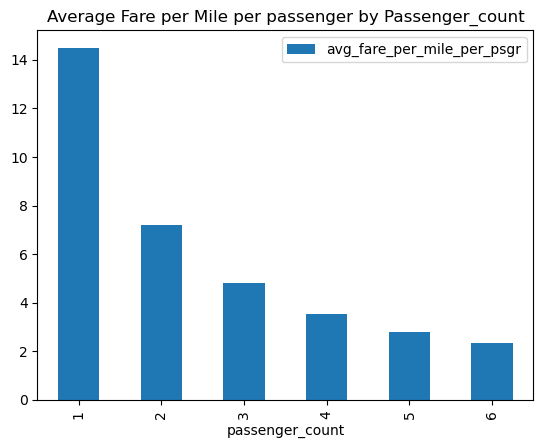

In [708]:
avg_fare.plot.bar(x='passenger_count',y='avg_fare_per_mile_per_psgr')
plt.title("Average Fare per Mile per passenger by Passenger_count")

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [711]:
# Compare the average fare per mile for different days and for different times of the day

avg_fare_by_hr=master_df3.groupby('PUhour').agg({'fare_per_mile':'mean'}).reset_index()

In [713]:
avg_fare_by_hr.columns=['PUhour','avg_fare_per_mile']

Text(0, 0.5, 'Avg_fare_per_mile')

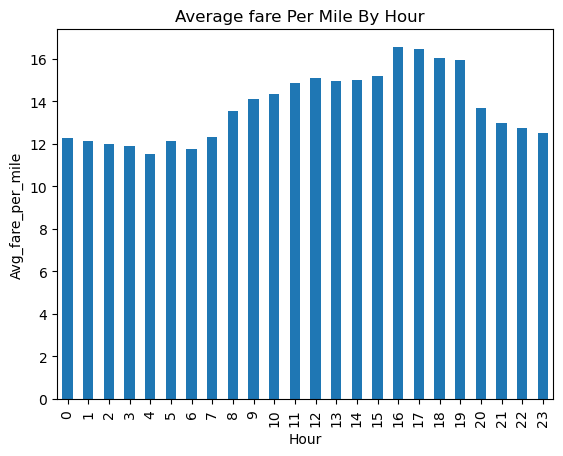

In [715]:
avg_fare_by_hr['avg_fare_per_mile'].plot.bar()
plt.title('Average fare Per Mile By Hour  ')
plt.xlabel('Hour')
plt.ylabel('Avg_fare_per_mile')

In [716]:
avg_fare_by_wday=master_df3.groupby('weekday').agg({'fare_per_mile':'mean'}).reset_index()

In [719]:
avg_fare_by_wday

weekday  fare_per_mile
0     Friday      14.710759
1     Monday      14.244770
2   Saturday      13.586372
3     Sunday      12.930803
4   Thursday      15.143392
5    Tuesday      15.049638
6  Wednesday      15.157481

In [721]:
avg_fare_by_wday.columns=['weekday','avg_fare_per_mile']

Text(0, 0.5, 'Avg_fare_per_mile')

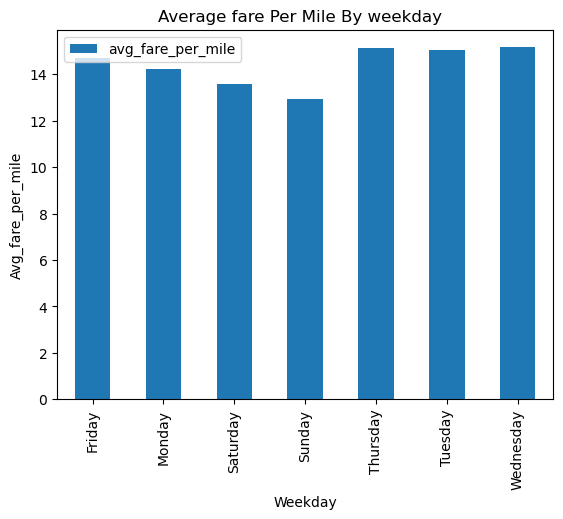

In [723]:
avg_fare_by_wday.plot.bar('weekday','avg_fare_per_mile')
plt.title('Average fare Per Mile By weekday  ')
plt.xlabel('Weekday')
plt.ylabel('Avg_fare_per_mile')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [726]:
# Compare fare per mile for different vendors

avg_fare_by_vendor=master_df3.groupby(['VendorID']).agg({'fare_per_mile':'mean'}).reset_index()

In [728]:
avg_fare_by_vendor_by_hr=master_df3.groupby(['VendorID','PUhour']).agg({'fare_per_mile':'mean'}).reset_index()

In [730]:
avg_fare_by_vendor.head()

VendorID  fare_per_mile
0         1      14.537852
1         2      14.439975

In [732]:
avg_fare_by_vendor.columns=['VendorID','avg_fare_per_mile']
avg_fare_by_vendor_by_hr.columns=['VendorID','PUhour','avg_fare_per_mile']

<Axes: xlabel='VendorID', ylabel='avg_fare_per_mile'>

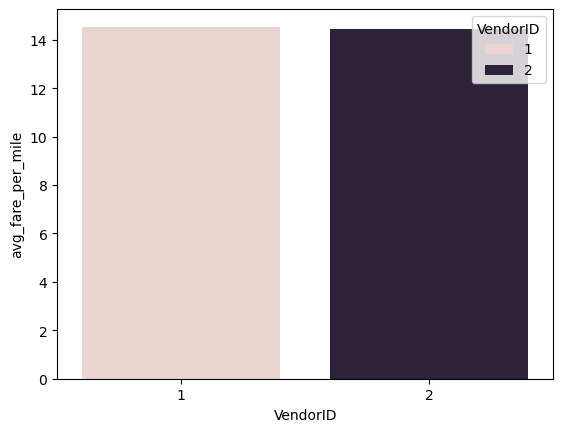

In [734]:
sns.barplot(avg_fare_by_vendor,x='VendorID',y='avg_fare_per_mile',hue='VendorID')

<Axes: xlabel='PUhour', ylabel='avg_fare_per_mile'>

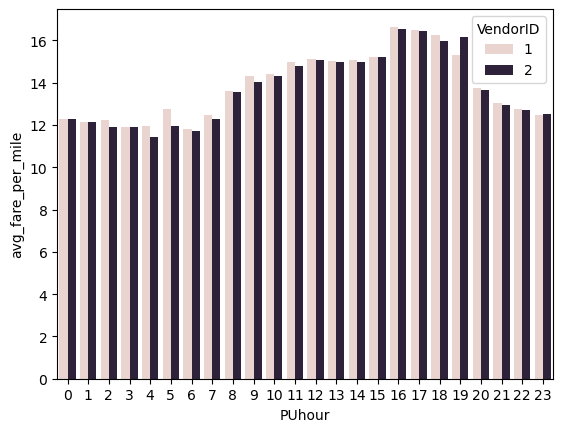

In [735]:
sns.barplot(avg_fare_by_vendor_by_hr,x='PUhour',y='avg_fare_per_mile',hue='VendorID')

In [737]:
del [[avg_fare_by_vendor,avg_fare_by_vendor_by_hr]]

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [741]:
# Defining distance tiers

master_df3['miles_tier']=master_df3['trip_distance'].apply(lambda x : 'mlt2' if x<=2 else ('mb25' if x>2 and x<=5 else 'mgt5'))

In [742]:
master_df3.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
1         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
2         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
3         1  2023-01-01 00:15:25   2023-01-01 00:22:35                2   
4         2  2023-01-01 00:24:48   2023-01-01 00:45:04                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24           1           161           237             1   
1           1.59           1            79           164             1   
2           3.16           1            79           256             1   
3           0.90           1           148           114             1   
4           2.78           1            79           186             1   

   fare_amount  ...     speed  weekend_flag  trips_count  trips_count_scaled  \
0          7.9  ...  0.183760             1          148                 296   
1         11.4  ...  0.151569             1          148                 296   
2         19.1  ...  0.187070             1          148                 296   
3          7.9  ...  0.114863             1          148                 296   
4         19.8  ...  0.230564             1          148                 296   

   trip  PU_trip_count  DOhour  DO_trip_count fare_per_mile  miles_tier  
0     1          955.0       0          626.0     12.483871        mlt2  
1     1         2738.0       1          471.0     12.377358        mlt2  
2     1         2738.0       0          153.0      9.531646        mb25  
3     1         1491.0       0          533.0     15.444444        mlt2  
4     1         2738.0       0          620.0     10.705036        mb25  

[5 rows x 46 columns]

In [745]:
avg_fare_by_vendor_milestier=master_df3.groupby(['VendorID','miles_tier']).agg({'fare_per_mile':'mean'})

In [747]:
avg_fare_by_vendor_milestier.columns=['avg_fare_per_mile']

In [749]:
avg_fare_by_vendor_milestier=avg_fare_by_vendor_milestier.sort_values(['VendorID','miles_tier'])

In [751]:
avg_fare_by_vendor_milestier

avg_fare_per_mile
VendorID miles_tier                   
1        mb25                 9.377389
         mgt5                 6.407832
         mlt2                17.034223
2        mb25                 9.628859
         mgt5                 6.492516
         mlt2                17.023763

<Axes: xlabel='miles_tier', ylabel='avg_fare_per_mile'>

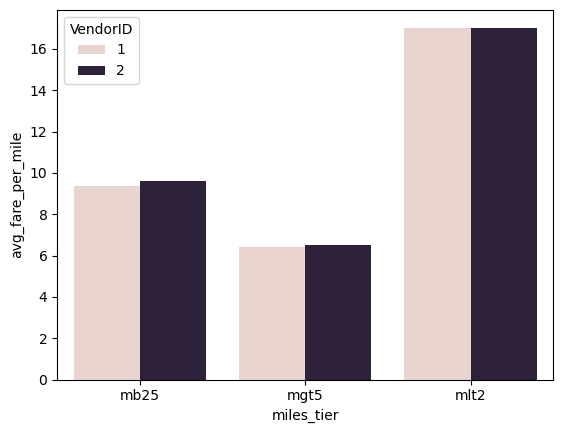

In [753]:
sns.barplot(avg_fare_by_vendor_milestier,x='miles_tier',y='avg_fare_per_mile',hue='VendorID')

In [754]:
del [[avg_fare_by_vendor_milestier]]

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [759]:
master_df3['avg_tip_%_by_dist']=100 * master_df3['tip_amount'] / master_df3.groupby(['miles_tier'])['tip_amount'].transform('sum')
master_df3['avg_tip_%_by_pcount']=100 * master_df3['tip_amount'] / master_df3.groupby(['passenger_count'])['tip_amount'].transform('sum')
master_df3['avg_tip_%_by_PUhour']=100 * master_df3['tip_amount'] / master_df3.groupby(['PUhour'])['tip_amount'].transform('sum')

In [760]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
master_df3['tip_%']=100 * master_df3['tip_amount'] / master_df3['total_amount']
tip_analysis=master_df3.groupby(['miles_tier','passenger_count','PUhour']).agg({'tip_%':'mean'})

In [762]:
master_df3.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled', 'trip',
       'PU_trip_count', 'DOhour', 'DO_trip_count', 'fare_per_mile',
       'miles_tier', 'avg_tip_%_by_dist', 'avg_tip_%_by_pcount',
       'avg_tip_%_by_PUhour', 'tip_%'],
      dtype='object')

In [765]:
tip_analysis

tip_%
miles_tier passenger_count PUhour           
mb25       1               0       14.823866
                           1       14.713115
                           2       14.749122
                           3       14.646769
                           4       14.779242
...                                      ...
mlt2       6               19      15.839533
                           20      15.222285
                           21      15.393496
                           22      15.488379
                           23      15.461986

[432 rows x 1 columns]

In [767]:
pivot_table = tip_analysis.pivot_table(values='tip_%', index='miles_tier', columns='PUhour', aggfunc='mean')
pivot_table.head()

PUhour             0          1          2          3          4          5   \
miles_tier                                                                     
mb25        14.637399  14.924771  14.453170  14.832488  15.016567  14.890417   
mgt5        12.966334  13.958555  12.913499  13.967481  12.794986  14.305216   
mlt2        15.468960  15.183019  15.476995  15.529560  15.313652  15.411394   

PUhour             6          7          8          9   ...         14  \
miles_tier                                              ...              
mb25        14.474581  14.727924  14.611983  15.210772  ...  15.310736   
mgt5        13.765378  13.740916  13.882758  13.600379  ...  14.482708   
mlt2        15.545003  15.472880  15.440037  15.733990  ...  15.783995   

PUhour             15         16         17         18         19         20  \
miles_tier                                                                     
mb25        15.237354  14.943338  14.746433  14.985602  14.876532  15.134479   
mgt5        14.545296  13.461683  12.588230  12.778519  12.766817  12.522353   
mlt2        15.693791  15.458822  15.436871  15.436062  15.519373  15.517821   

PUhour             21         22         23  
miles_tier                                   
mb25        15.169553  15.213502  15.075084  
mgt5        13.482091  13.204543  13.689930  
mlt2        15.547229  15.584173  15.408559  

[3 rows x 24 columns]

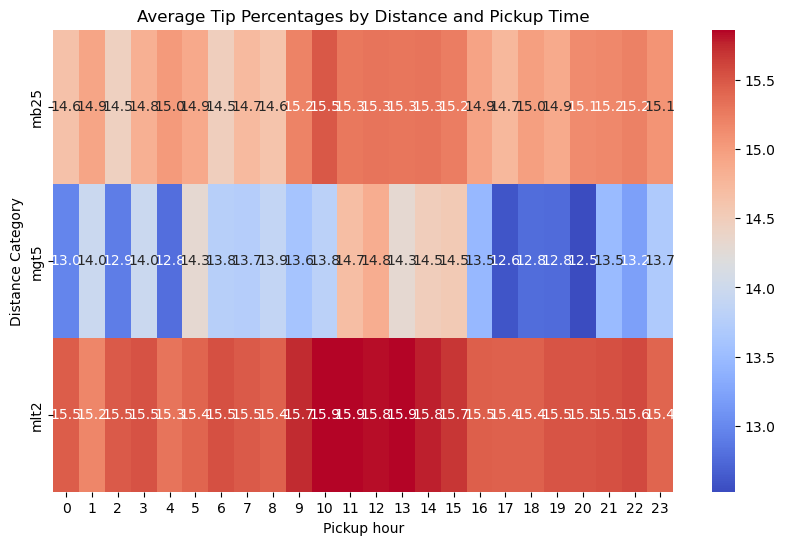

In [769]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, fmt=".1f")
plt.title("Average Tip Percentages by Distance and Pickup Time")
plt.xlabel("Pickup hour")
plt.ylabel("Distance Category")
plt.show()


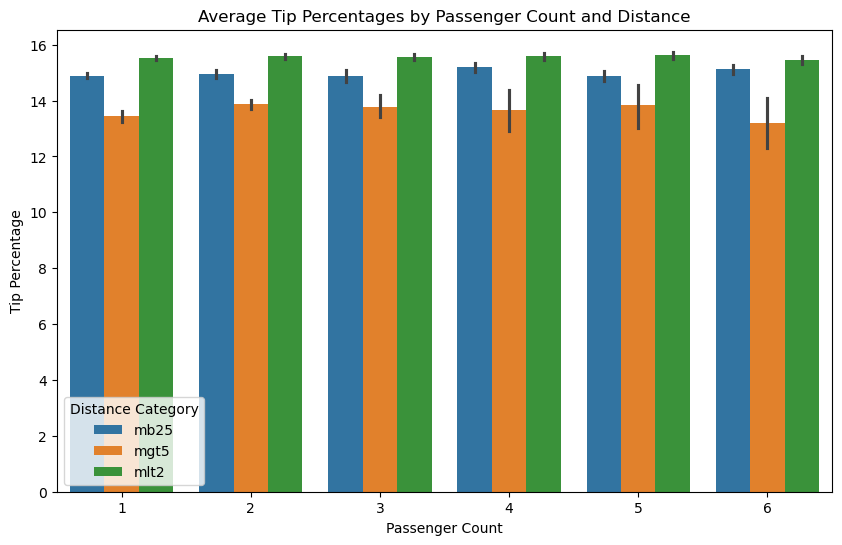

In [770]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tip_analysis, x='passenger_count', y='tip_%', hue='miles_tier')
plt.title("Average Tip Percentages by Passenger Count and Distance")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage")
plt.legend(title="Distance Category")
plt.show()


In [771]:
master_df3.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'PUdate', 'PUhour', 'PUyear',
       'PUmonth', 'PUmday', 'weekday', 'quarter', 'trip_duration_mins',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'PUzone', 'borough', 'geometry',
       'DOzone', 'route_id', 'route_name', 'avg_trip_duration_mins', 'speed',
       'weekend_flag', 'trips_count', 'trips_count_scaled', 'trip',
       'PU_trip_count', 'DOhour', 'DO_trip_count', 'fare_per_mile',
       'miles_tier', 'avg_tip_%_by_dist', 'avg_tip_%_by_pcount',
       'avg_tip_%_by_PUhour', 'tip_%'],
      dtype='object')

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Text(0.5, 1.0, 'trip_duration_mins')

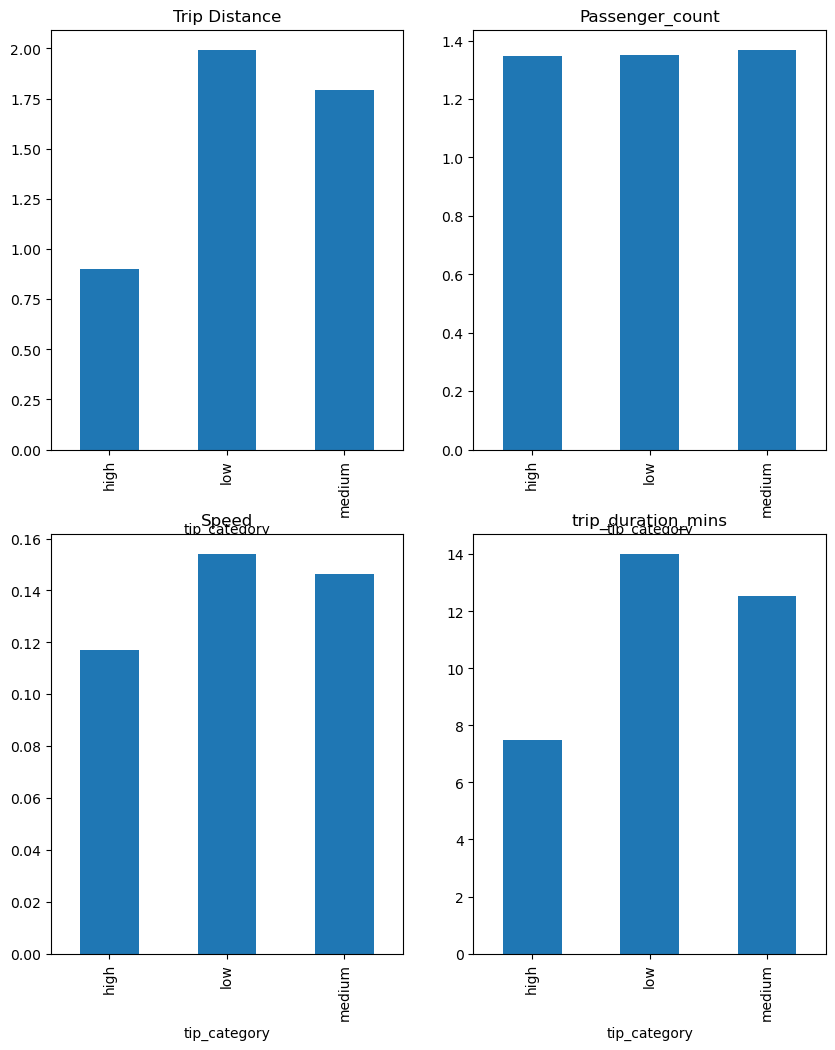

In [773]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
master_df3['tip_category']=master_df3['tip_%'].apply(lambda x : 'high' if x > 25 else ('low' if x < 10 else 'medium'))
master_df3.head()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 12))
master_df3.groupby('tip_category')['trip_distance'].mean().plot.bar(ax=axes[0,0])
axes[0, 0].set_title("Trip Distance")

master_df3.groupby('tip_category')['passenger_count'].mean().plot.bar(ax=axes[0,1])
axes[0, 1].set_title("Passenger_count")

master_df3.groupby('tip_category')['speed'].mean().plot.bar(ax=axes[1,0])
axes[1, 0].set_title("Speed")

master_df3.groupby('tip_category')['trip_duration_mins'].mean().plot.bar(ax=axes[1,1])
axes[1, 1].set_title("trip_duration_mins")



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

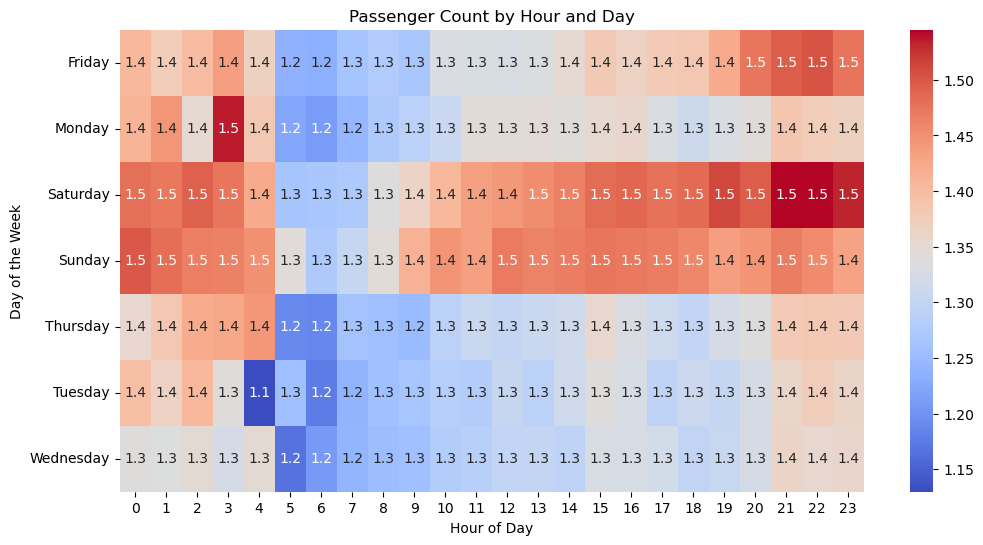

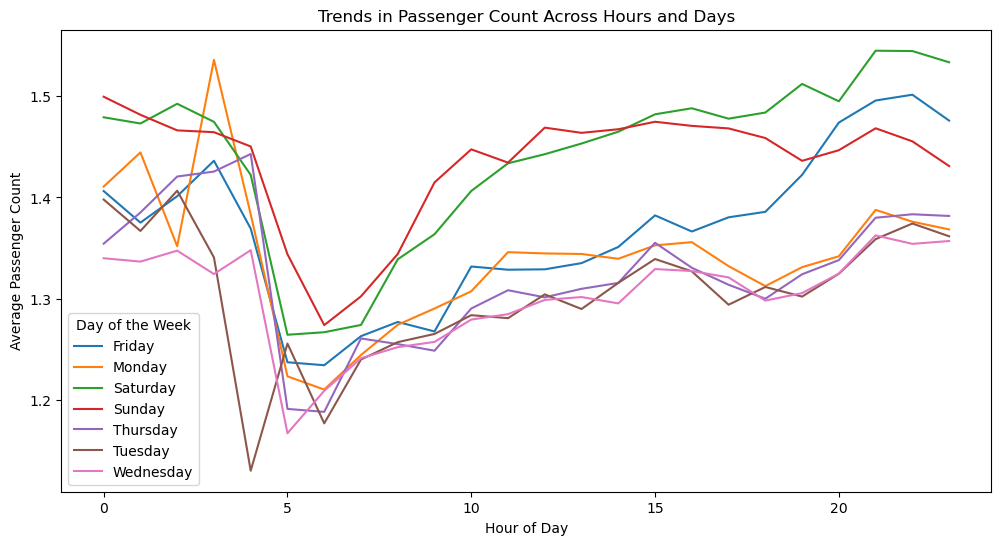

In [775]:
# See how passenger count varies across hours and days

psgr_count_analysis=master_df3.groupby(['weekday','PUhour']).agg({'passenger_count':'mean'})


pivot_table = psgr_count_analysis.pivot_table(index='weekday', columns='PUhour', values='passenger_count')


plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, fmt=".1f")
plt.title('Passenger Count by Hour and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=psgr_count_analysis, x='PUhour', y='passenger_count', hue='weekday', palette='tab10')
plt.title('Trends in Passenger Count Across Hours and Days')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.legend(title='Day of the Week')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [778]:
# How does passenger count vary across zones

psgr_count_analysis=master_df3.groupby(['PUzone']).agg({'passenger_count':'mean'})

In [779]:
psgr_count_analysis_for_plot=psgr_count_analysis

In [782]:
psgr_count_analysis=psgr_count_analysis.reset_index()

In [783]:
psgr_count_analysis.columns=['PUzone','avg_passenger_count']

In [784]:
psgr_count_analysis.sort_values('avg_passenger_count',ascending=False).reset_index(drop=True).head(10)

PUzone  avg_passenger_count
0           Ocean Parkway South             6.000000
1            Claremont/Bathgate             5.000000
2                      Flushing             4.500000
3              Inwood Hill Park             3.000000
4                  Howard Beach             2.500000
5               Queensboro Hill             2.500000
6                    Highbridge             2.333333
7                     Rego Park             2.250000
8  Flushing Meadows-Corona Park             2.083333
9                Queens Village             2.000000

<Axes: ylabel='PUzone'>

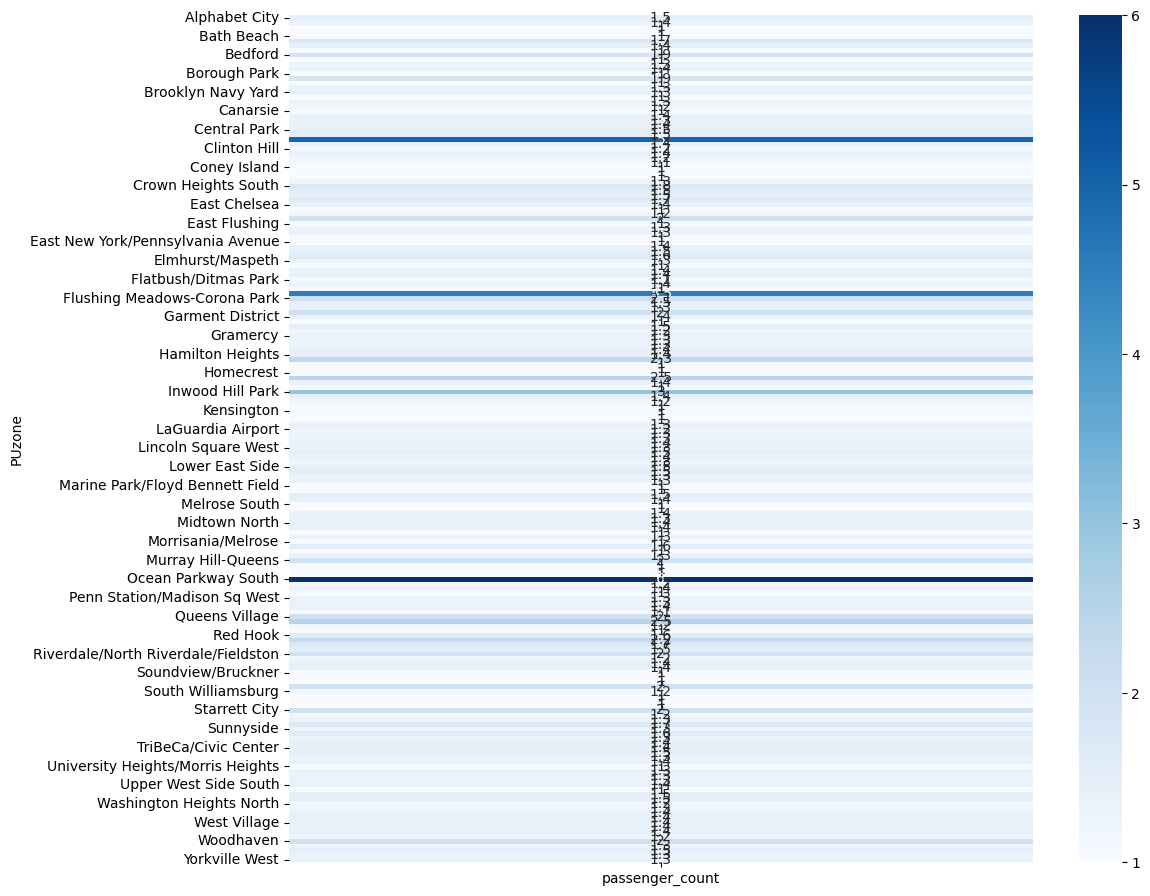

In [785]:
plt.figure(figsize=(12, 11))
sns.heatmap(psgr_count_analysis_for_plot, annot=True,cmap='Blues')

In [786]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [787]:
psgr_count_zone=psgr_count_analysis.reset_index(drop=True)

In [789]:
psgr_count_zone.head()

PUzone  avg_passenger_count
0  Alphabet City             1.450627
1        Astoria             1.360406
2     Auburndale             1.000000
3   Baisley Park             1.000000
4     Bath Beach             1.000000

In [790]:
psgr_count_zone.columns=['PUzone','avg_psgr_count']

In [791]:
psgr_count_zone.duplicated().sum()

0

In [792]:
psgr_count_zone[psgr_count_zone.avg_psgr_count==max(psgr_count_zone.avg_psgr_count)]

PUzone  avg_psgr_count
120  Ocean Parkway South             6.0

In [794]:
psgr_count_zone.columns

Index(['PUzone', 'avg_psgr_count'], dtype='object')

In [808]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zone_avg_psgr_count=zones.merge(psgr_count_zone, left_on='zone',right_on='PUzone',how='left')

In [810]:
zone_avg_psgr_count.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

           PUzone  avg_psgr_count  
0  Newark Airport        1.000000  
1             NaN             NaN  
2             NaN             NaN  
3   Alphabet City        1.450627  
4             NaN             NaN

Text(0.5, 1.0, 'AVG PASSENGER COUNT BY ZONE')

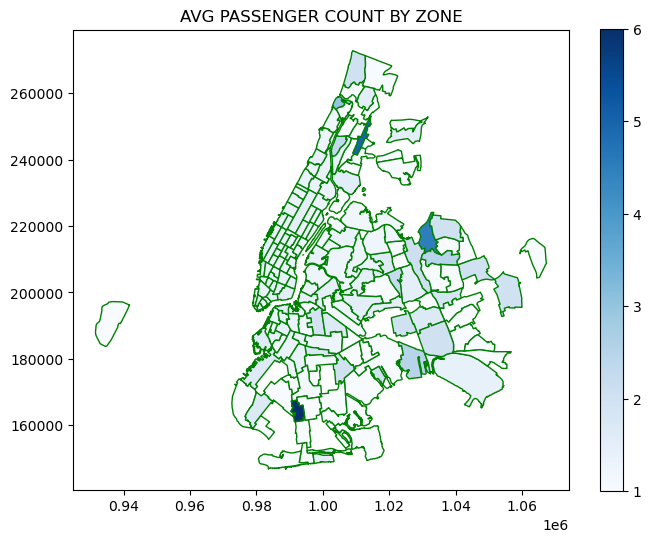

In [812]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

# Plot the map and display it
zone_avg_psgr_count.plot(ax=ax, column='avg_psgr_count', cmap='Blues', edgecolor='g', legend=True)
ax.set_title("AVG PASSENGER COUNT BY ZONE")

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [816]:
# How often is each surcharge applied?
extra_chrg=master_df3[master_df3['extra']>0]
extra_by_puhr=extra_chrg.groupby(['PUhour']).agg({'extra':'count'})


<Axes: xlabel='PUhour'>

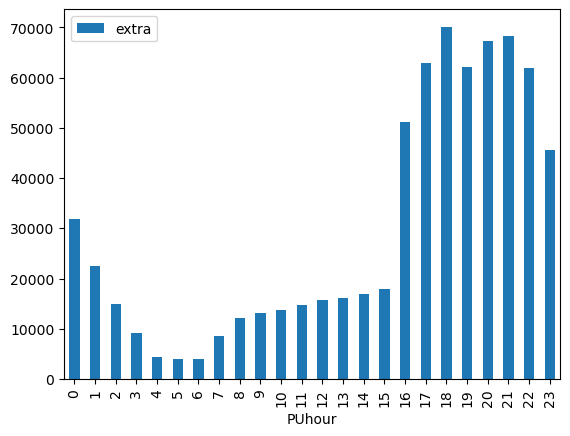

In [818]:
extra_by_puhr.plot.bar()

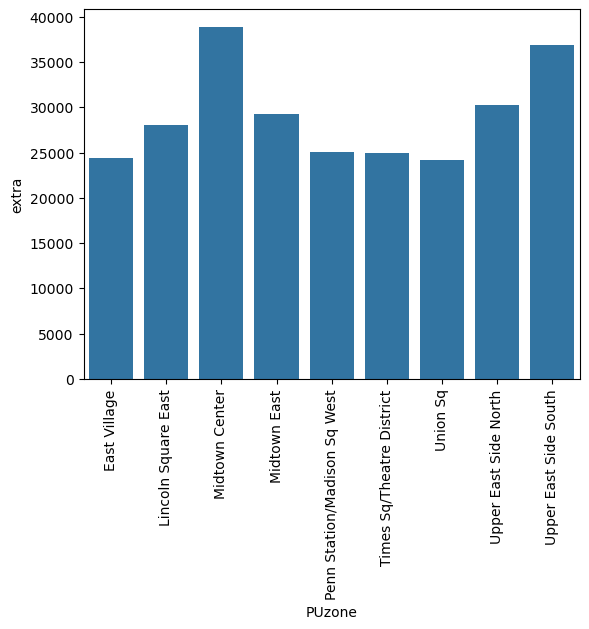

In [819]:
extra_by_puzone=extra_chrg.groupby(['PUzone']).agg({'extra':'count'})
th=extra_by_puzone['extra'].quantile(0.95)
extra_by_puzone1=extra_by_puzone[extra_by_puzone['extra']>th]
ax=sns.barplot(extra_by_puzone1, x="PUzone", y="extra")
ax.tick_params(axis='x', labelrotation=90)
plt.show()

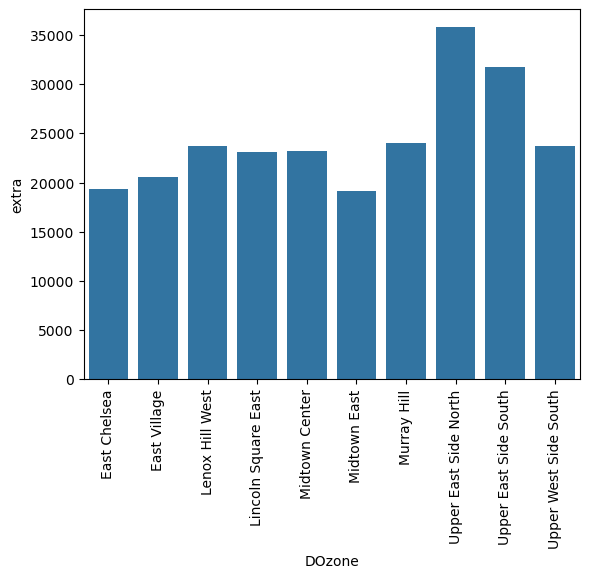

In [821]:
extra_by_dozone=extra_chrg.groupby(['DOzone']).agg({'extra':'count'})
doth=extra_by_dozone['extra'].quantile(0.95)
extra_by_dozone1=extra_by_dozone[extra_by_dozone['extra']>doth]
ax=sns.barplot(extra_by_dozone1, x="DOzone", y="extra")
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

	Taxi vendors could allocate more vehicles  during peak hours ( 17 to 19)  in high-demand zones based  on  Pickup and drop off count  to meet traveler needs ( Refer top 10 busy zones by pickup/dropoff) 

	Thursdays and Wednesdays  stand out with the highest pickup counts and vendors plan to deploy more on these days and avoid any maintenance activity on these days to maintain proper demand-supply .

	As the passenger count is not  influencing trip metrics as per correlation analysis  , we can use this as an opportunity for optimizing shared rides or group travel services.

	Introducing live streaming system to capture vehicle traffics and demands by zones  which will enable both business to optimize and help drivers to position them accordingly  to meet the demand-supply  as well take ideal routes for better customer experience  



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

	Assigning more vehicles  to high-demand areas based on surcharge analysis or trip count analysis (e.g., Midtown_center during peak hours based on surcharge analysis )

	Business can assign additional vehicles to Midtown Center, Upper East Side South, and other high-surcharge zones ( by pickup or drop off) to meet the demand efficiently.

	We observed  trip count peaks at hour 18:00 , and this  a potential opportunity for adjusting fares or including  more vehicles to meet this higher demand.

	As Sundays are  having low activity, this can be boosted by introducing week end deals or any promotional discounts .

	Encouraging drivers with additional bonus and making them to take more trips during peak hours  17 to 19  or on peak days -Thursdays

	Introducing discount offers  or any event-based deals during Q3 timeline can boost activity during Q3 and eventually increase revenue contribution from that quarter



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

	Collaborating with businesses or events to promote rides on  high fare days can increase revenue.

	Monday seems to have low activity in weekdays , we can optimize it by introducing group deals or any promotional deals like flat rate for long distance rides by distance category 

	Demand based dynamic pricing during peak hours(17 to 19)  could increase revenue

	Introducing promotional campaigns during the low fare rate hours for premium quality vehicles will boost ridership 

	East village has good traffic during night hours comparatively with other zones and placing more vehicles and applying night rate card can increase revenue. 

	We can improve customer experience by mentioning reason for surcharge in the bill . (Eg: Peak congestion, high demand, remote pickup/drop-off where return trip chances are less ) . And Vendor 1 can justify higher costs for short distances by improving customer experience, faster pickups  and premium category vehicle.

